<a href="https://colab.research.google.com/github/Muhammad-Ahmed22/FDA-Riskified/blob/main/Riskified_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
print("Google Drive mounted successfully.")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# For XGBoost/LightGBM - install if not present
# import xgboost as xgb
# import lightgbm as lgb
from sklearn.naive_bayes import GaussianNB # or CategoricalNB if features are suitable
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc, f1_score, recall_score, precision_score
from imblearn.over_sampling import SMOTE # for handling imbalance

# Load data
DRIVE_PATH = '/content/drive/MyDrive/FDA Final/'
FRAUD_FILE_NAME = 'Fraud_Data.csv'
IP_FILE_NAME = 'IpAddress_to_Country.csv'
FRAUD_FILE_PATH = DRIVE_PATH + FRAUD_FILE_NAME
IP_FILE_PATH = DRIVE_PATH + IP_FILE_NAME
dataset = pd.read_csv(FRAUD_FILE_PATH)
ip_dataset = pd.read_csv(IP_FILE_PATH)
print("Data loaded successfully.")



Mounted at /content/drive
Google Drive mounted successfully.
Data loaded successfully.


In [ ]:
dataset.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [ ]:
dataset.info() #(check data types, non-null counts)
dataset.describe(include='all')
dataset.isnull().sum() #(identify missing values)
dataset['class'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


,proportion
class,
0,0.906354
1,0.093646



Distribution of 'class':
class
0    90.635423
1     9.364577
Name: proportion, dtype: float64


<ipython-input-5-9b627a7f9271>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=dataset, palette=['skyblue', 'salmon'])


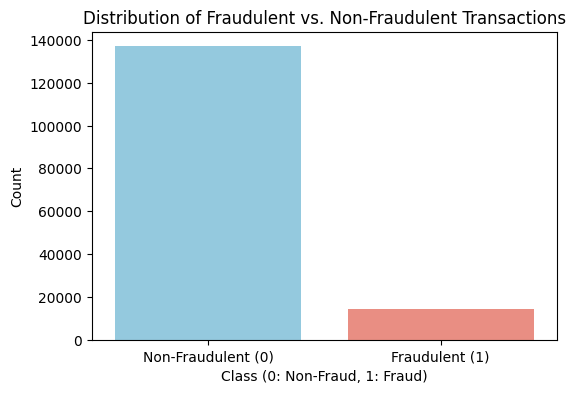


Plotting categorical features: ['source', 'browser', 'sex']


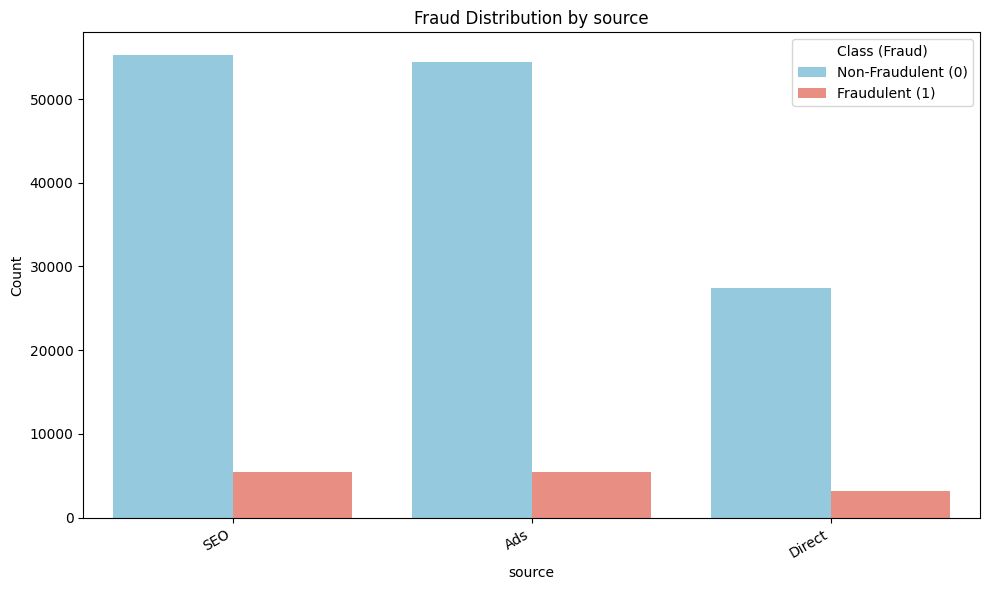

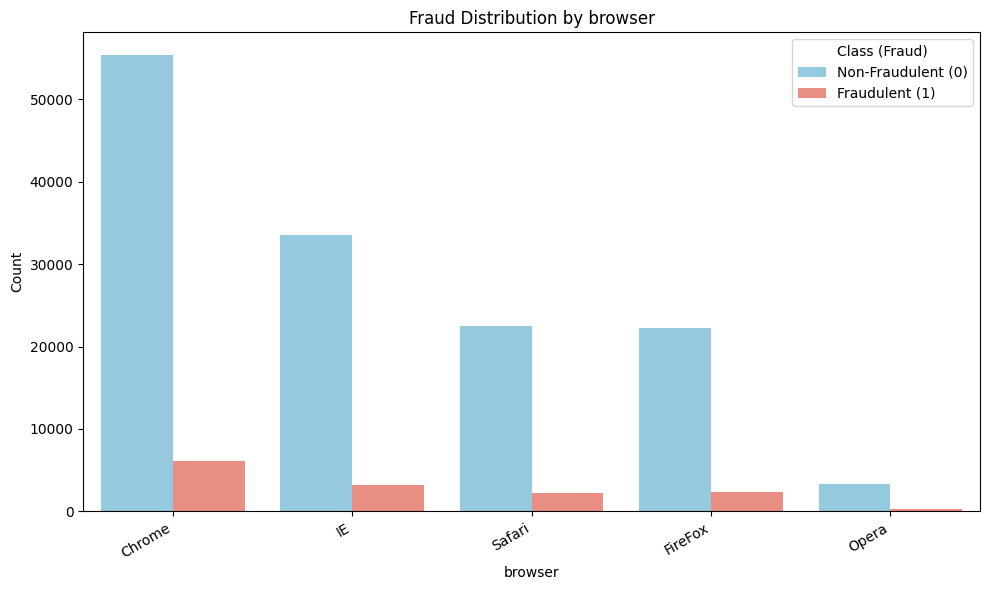

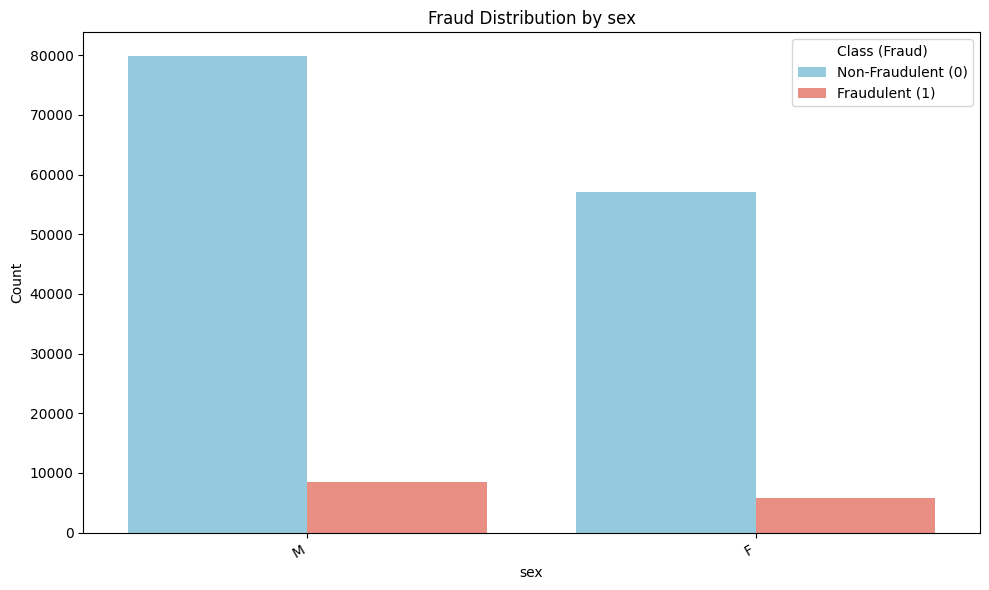


Plotting numerical features: ['purchase_value', 'age']


<ipython-input-5-9b627a7f9271>:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Class (Fraud)')


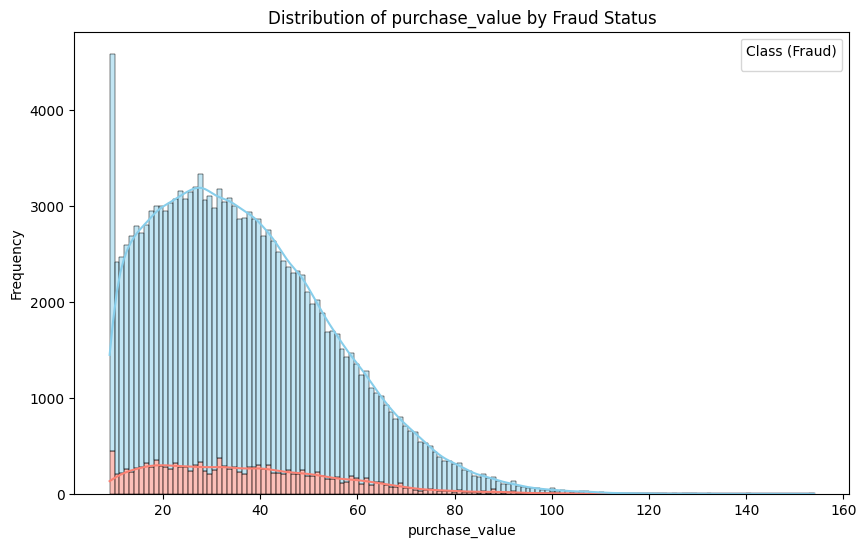

<ipython-input-5-9b627a7f9271>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='class', y=feature, palette=['skyblue', 'salmon'])


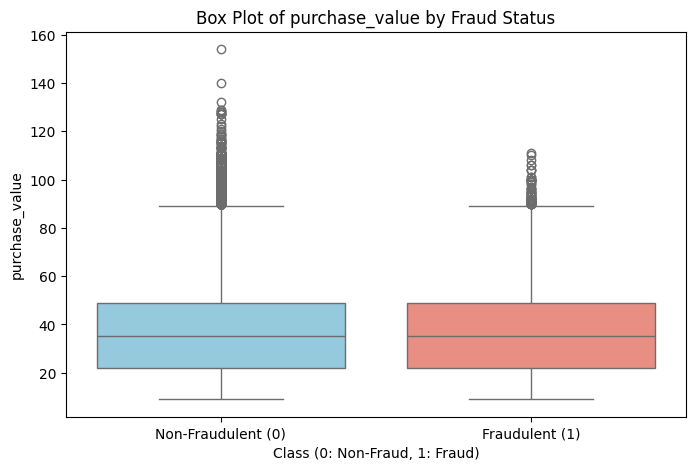

<ipython-input-5-9b627a7f9271>:61: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Class (Fraud)')


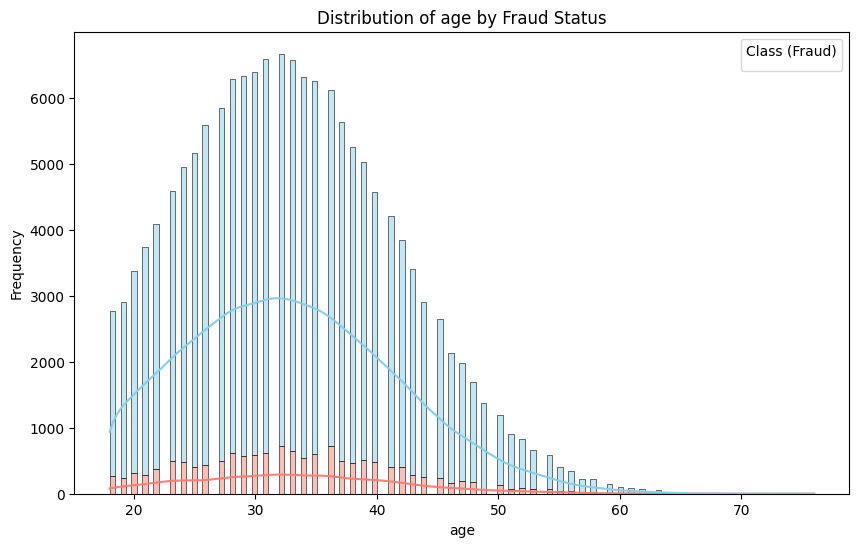

<ipython-input-5-9b627a7f9271>:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='class', y=feature, palette=['skyblue', 'salmon'])


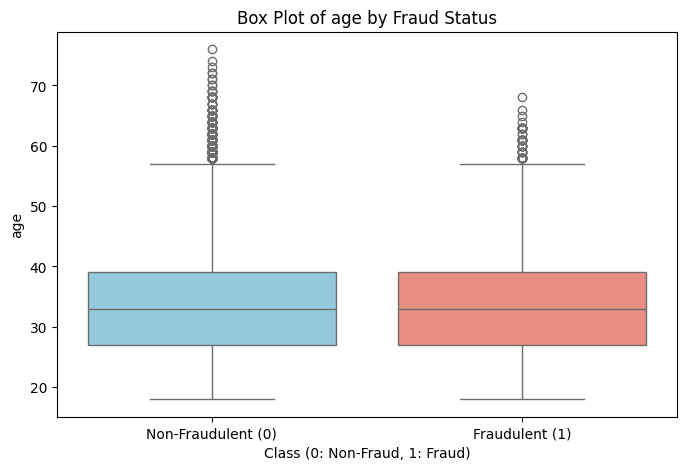


Preliminary EDA for 'purchase_time':


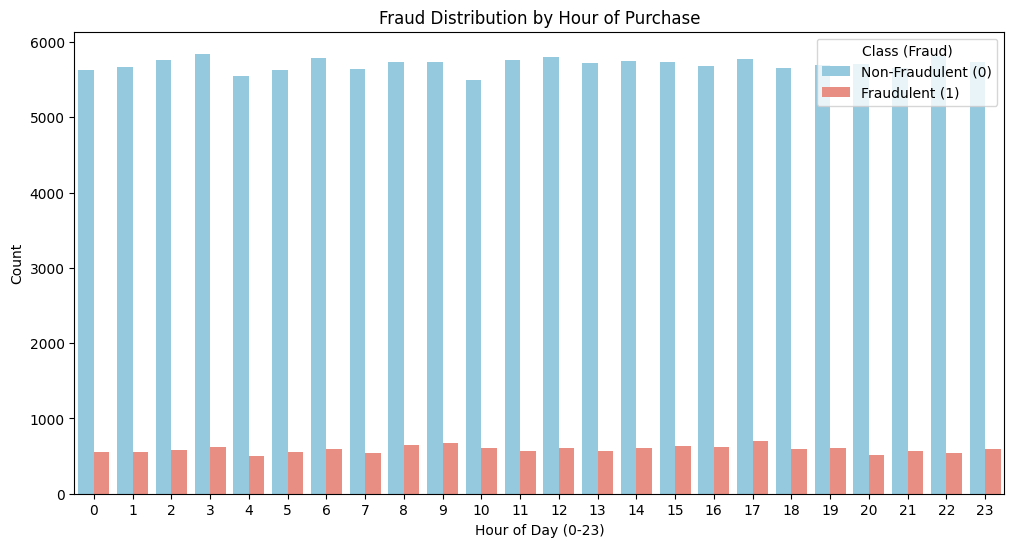


Unique value counts for ID-like columns:
Number of unique values in 'user_id': 151112
Number of unique values in 'device_id': 137956
Number of unique values in 'ip_address': 143512

Correlation matrix for numerical features (and target 'class'):


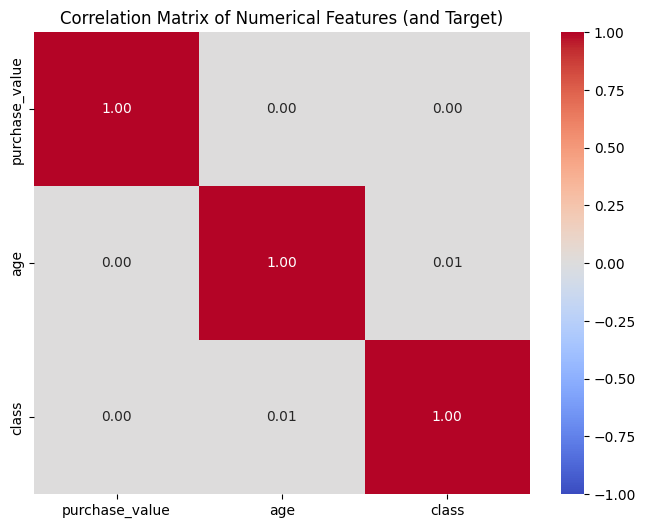


--- Phase 1 EDA Visualizations Complete ---


In [ ]:
# 1. Distribution of 'class' (Target Variable)
print("\nDistribution of 'class':")
print(dataset['class'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=dataset, palette=['skyblue', 'salmon'])
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraudulent (0)', 'Fraudulent (1)'])
plt.show()

# 2. Categorical Features vs. 'class'
# Your relevant categorical features: 'source', 'browser', 'sex'.
# 'device_id' is likely too high cardinality for direct countplot here.
# 'ip_address' is float but represents an ID, also too high cardinality.
categorical_eda_features = ['source', 'browser', 'sex']

print(f"\nPlotting categorical features: {categorical_eda_features}")
for feature in categorical_eda_features:
    if feature in dataset.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=dataset, x=feature, hue='class', palette=['skyblue', 'salmon'], order = dataset[feature].value_counts().index)
        plt.title(f'Fraud Distribution by {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.legend(title='Class (Fraud)', labels=['Non-Fraudulent (0)', 'Fraudulent (1)'])
        plt.xticks(rotation=30, ha='right') # Rotate labels if they overlap
        plt.tight_layout()
        plt.show()
    else:
        print(f"Warning: Categorical feature '{feature}' not found in DataFrame. Skipping plot.")

# 3. Numerical Features vs. 'class'
# Your relevant numerical features: 'purchase_value', 'age'.
numerical_eda_features = ['purchase_value', 'age']

print(f"\nPlotting numerical features: {numerical_eda_features}")
for feature in numerical_eda_features:
    if feature in dataset.columns:
        # Histogram
        plt.figure(figsize=(10, 6))
        sns.histplot(data=dataset, x=feature, hue='class', kde=True, multiple="stack", palette=['skyblue', 'salmon'])
        plt.title(f'Distribution of {feature} by Fraud Status')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        # Manually set legend labels if auto-detection is off due to stacking order
        handles, labels = plt.gca().get_legend_handles_labels()
        if len(labels) >= 2: # Check if legend items are present
            # The order of labels in 'multiple="stack"' can sometimes be tricky.
            # If '0' appears first in the stack for the first bin, then labels should be ['Non-Fraud (0)', 'Fraud (1)']
            # If '1' appears first, then reverse. Usually, it follows the hue order of your classes.
            # Assuming class 0 is plotted first in the stack generally.
            legend_labels_map = {'0': 'Non-Fraudulent (0)', '1': 'Fraudulent (1)'}
            try:
                ordered_labels = [legend_labels_map[lbl] for lbl in labels[:2]] # Take first two labels from plot
                plt.legend(handles[:2], ordered_labels, title='Class (Fraud)')
            except KeyError: # Fallback if labels are not '0', '1'
                 plt.legend(title='Class (Fraud)')
        else:
            plt.legend(title='Class (Fraud)')
        plt.show()

        # Boxplot
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=dataset, x='class', y=feature, palette=['skyblue', 'salmon'])
        plt.title(f'Box Plot of {feature} by Fraud Status')
        plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
        plt.xticks([0, 1], ['Non-Fraudulent (0)', 'Fraudulent (1)'])
        plt.ylabel(feature)
        plt.show()
    else:
        print(f"Warning: Numerical feature '{feature}' not found in DataFrame. Skipping plot.")

# 4. Time-Based Features (Preliminary EDA - 'purchase_time')
# Convert 'purchase_time' to datetime for this EDA step.
# Note: In your dataset.info(), 'purchase_time' is 'object'.
print("\nPreliminary EDA for 'purchase_time':")
if 'purchase_time' in dataset.columns:
    try:
        # Create a temporary series for EDA to avoid altering original 'dataset' prematurely
        temp_purchase_time_dt = pd.to_datetime(dataset['purchase_time'])
        purchase_hour = temp_purchase_time_dt.dt.hour

        plt.figure(figsize=(12, 6))
        sns.countplot(x=purchase_hour, hue=dataset['class'], palette=['skyblue', 'salmon'])
        plt.title('Fraud Distribution by Hour of Purchase')
        plt.xlabel('Hour of Day (0-23)')
        plt.ylabel('Count')
        plt.legend(title='Class (Fraud)', labels=['Non-Fraudulent (0)', 'Fraudulent (1)'])
        plt.show()
    except Exception as e:
        print(f"Could not process 'purchase_time' for hourly EDA: {e}")
        print("Ensure 'purchase_time' is in a format convertible to datetime.")
else:
    print("Warning: 'purchase_time' column not found for hourly EDA.")


# 5. Unique Value Counts for ID-like columns
print("\nUnique value counts for ID-like columns:")
id_columns = ['user_id', 'device_id', 'ip_address']
for col in id_columns:
    if col in dataset.columns:
        print(f"Number of unique values in '{col}': {dataset[col].nunique()}")
    else:
        print(f"Warning: ID column '{col}' not found in DataFrame.")

# 6. Correlation Matrix (for current numerical features)
print("\nCorrelation matrix for numerical features (and target 'class'):")
# Select only columns that are definitely numeric and relevant for this initial correlation
cols_for_corr = ['purchase_value', 'age', 'class']
# Filter to ensure only existing columns are used
cols_for_corr_existing = [col for col in cols_for_corr if col in dataset.columns and pd.api.types.is_numeric_dtype(dataset[col])]

if len(cols_for_corr_existing) > 1: # Need at least two columns for correlation
    numerical_corr_df = dataset[cols_for_corr_existing]
    plt.figure(figsize=(8, 6))
    sns.heatmap(numerical_corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title('Correlation Matrix of Numerical Features (and Target)')
    plt.show()
else:
    print("Not enough numerical columns found or specified for a meaningful correlation matrix.")

print("\n--- Phase 1 EDA Visualizations Complete ---")

In [ ]:
# --- Ensure 'dataset' DataFrame is loaded ---

# 1. Convert time columns to datetime objects
dataset['signup_time'] = pd.to_datetime(dataset['signup_time'])
dataset['purchase_time'] = pd.to_datetime(dataset['purchase_time'])

# 2. Engineer Time-Based Features
# From purchase_time
dataset['purchase_hour'] = dataset['purchase_time'].dt.hour
dataset['purchase_day_of_week'] = dataset['purchase_time'].dt.dayofweek # Monday=0, Sunday=6
dataset['purchase_day_of_month'] = dataset['purchase_time'].dt.day # Day of month
dataset['purchase_is_weekend'] = (dataset['purchase_day_of_week'] >= 5).astype(int) # 5: Saturday, 6: Sunday

# From signup_time
dataset['signup_hour'] = dataset['signup_time'].dt.hour
dataset['signup_day_of_week'] = dataset['signup_time'].dt.dayofweek
dataset['signup_is_weekend'] = (dataset['signup_day_of_week'] >= 5).astype(int)

# Time difference between signup and purchase (IMPORTANT BEHAVIORAL)
dataset['time_since_signup_seconds'] = (dataset['purchase_time'] - dataset['signup_time']).dt.total_seconds()
# Handle potential negative values if purchase_time < signup_time (data error or specific meaning)
# For now, let's assume purchase_time is always >= signup_time. If not, investigate.
# You might also want to cap this or log transform if the range is huge. For now, keep as seconds.

# 3. Handling High Cardinality ID Features (user_id, device_id, ip_address)
# For this iteration, especially with the time constraint:
# - 'user_id' is unique per row, so it doesn't add predictive value for a transaction-level model.
# - 'device_id' and 'ip_address' have high cardinality.
#   Direct One-Hot Encoding will lead to too many features.
#   Target/Frequency encoding can be powerful but adds complexity with train/test splits to avoid leakage.
#
# Decision for speed: We will likely DROP these raw ID columns before modeling for the first pass.
# We are relying on other engineered features (time, purchase details, source, browser)
# to capture behavioral patterns.
# If model performance is poor, we can revisit encoding strategies for device_id/ip_address.

print("Engineered features:")
print(dataset[['purchase_hour', 'purchase_day_of_week', 'purchase_is_weekend',
               'signup_hour', 'signup_day_of_week', 'signup_is_weekend',
               'time_since_signup_seconds']].head())

# Display basic stats for the new time_since_signup_seconds
print("\nStats for 'time_since_signup_seconds':")
print(dataset['time_since_signup_seconds'].describe())

# Check for any negative time_since_signup_seconds which would indicate data issues
print(f"\nNumber of transactions where purchase_time < signup_time: {(dataset['time_since_signup_seconds'] < 0).sum()}")

# --- Next Steps after this would be: ---
# 1. Define X (features) and y (target)
# 2. Drop original time string columns, and user_id, device_id, ip_address for now.
# 3. Identify final list of categorical and numerical features for preprocessing.
# 4. Preprocessing: OneHotEncoding for categoricals, Scaling for numericals.
# 5. Train-test split.
# 6. Handle class imbalance (e.g., SMOTE on training data).
# 7. Model training and evaluation.

Engineered features:
   purchase_hour  purchase_day_of_week  purchase_is_weekend  signup_hour  \
0              2                     5                    1           22   
1              1                     0                    0           20   
2             18                     3                    0           18   
3             13                     0                    0           21   
4             18                     2                    0            7   

   signup_day_of_week  signup_is_weekend  time_since_signup_seconds  
0                   1                  0                  4506682.0  
1                   6                  1                    17944.0  
2                   3                  0                        1.0  
3                   1                  0                   492085.0  
4                   1                  0                  4361461.0  

Stats for 'time_since_signup_seconds':
count    1.511120e+05
mean     4.932029e+06
std      3.126263e

In [ ]:
ip_dataset.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [ ]:
import pandas as pd
import numpy as np

# --- 1. Prepare ip_dataset ---
print("Preparing ip_dataset...")
# Ensure data types are correct for the IP bounds
ip_dataset['lower_bound_ip_address'] = ip_dataset['lower_bound_ip_address'].astype(np.int64)
ip_dataset['upper_bound_ip_address'] = ip_dataset['upper_bound_ip_address'].astype(np.int64)
# The 'country' column should ideally be string, pandas usually infers this correctly.

# Sort ip_dataset by the lower bound of the IP range. THIS IS CRUCIAL for searchsorted.
ip_dataset = ip_dataset.sort_values('lower_bound_ip_address').reset_index(drop=True)

print("ip_dataset prepared and sorted (head):")
print(ip_dataset.head())


# --- 2. Prepare 'ip_address' in the main 'dataset' ---
print("\nPreparing 'ip_address' in main transaction dataset...")
# The 'ip_address' in your transaction 'dataset' is a float, convert it to int64
# We'll create a temporary column for this conversion.
dataset['ip_address_temp_int'] = dataset['ip_address'].astype(np.int64)

print("Main dataset with temporary 'ip_address_temp_int' (head):")
print(dataset[['ip_address', 'ip_address_temp_int']].head())


# --- 3. Perform the Interval Join to map IPs to Countries ---
print("\nPerforming interval join to map IPs to countries...")

# Create a Series from ip_dataset's sorted lower bounds for efficient searching.
# The Series values are the original indices of ip_dataset, allowing us to map back.
sorted_lower_bounds_in_ip_dataset = ip_dataset['lower_bound_ip_address']

# Find the indices where each transaction IP would be inserted into the sorted lower bounds.
# 'side="right"' means if an IP matches a lower_bound, it gets the index of that bound.
# Subtracting 1 gives the index of the range *preceding* the insertion point,
# which is the candidate range that *could* contain the transaction IP.
candidate_indices_for_ip_dataset = sorted_lower_bounds_in_ip_dataset.searchsorted(
    dataset['ip_address_temp_int'], side='right'
) - 1

# Initialize the new 'ip_country' column in the main 'dataset' with a default value.
dataset['ip_country'] = "Unknown_Country"

# Create a mask for valid candidate_indices (must be >= 0).
# An index of -1 means the transaction IP is smaller than all lower_bounds in ip_dataset.
valid_candidate_mask = (candidate_indices_for_ip_dataset >= 0)

# Filter: Only proceed with valid candidates in the main 'dataset'.
dataset_ips_to_check = dataset.loc[valid_candidate_mask, 'ip_address_temp_int']

# Get the corresponding row indices from 'ip_dataset' for these valid candidates.
# These are the actual row numbers in the (sorted) ip_dataset.
ip_dataset_row_indices_for_candidates = candidate_indices_for_ip_dataset[valid_candidate_mask]

# Retrieve the IP range bounds and country names from 'ip_dataset' for these candidate rows.
candidate_lower_ips = ip_dataset.loc[ip_dataset_row_indices_for_candidates, 'lower_bound_ip_address'].values
candidate_upper_ips = ip_dataset.loc[ip_dataset_row_indices_for_candidates, 'upper_bound_ip_address'].values
candidate_countries = ip_dataset.loc[ip_dataset_row_indices_for_candidates, 'country'].values

# Now, check if the transaction IPs (dataset_ips_to_check) truly fall within their candidate IP ranges.
match_condition = (dataset_ips_to_check.values >= candidate_lower_ips) & \
                  (dataset_ips_to_check.values <= candidate_upper_ips)

# Get the original indices from the main 'dataset' where a true match occurred.
# These are the .index values of the 'dataset' DataFrame for matched rows.
original_dataset_indices_of_matches = dataset.index[valid_candidate_mask][match_condition]

# Assign the identified countries to the 'ip_country' column in the main 'dataset' for matched IPs.
# We use 'candidate_countries[match_condition]' to get the countries only for the true matches.
dataset.loc[original_dataset_indices_of_matches, 'ip_country'] = candidate_countries[match_condition]


# --- 4. Cleanup ---
print("\nCleaning up temporary columns...")
dataset.drop(columns=['ip_address_temp_int'], inplace=True, errors='ignore')


# --- 5. Output and Verification ---
print("\nMain dataset with new 'ip_country' feature (head):")
print(dataset[['ip_address', 'ip_country', 'class']].head(10)) # Show a few more rows

print("\nValue counts for 'ip_country' (Top 15 and Unknown):")
# Display more common countries and the count of "Unknown_Country"
ip_country_counts = dataset['ip_country'].value_counts(dropna=False)
print(ip_country_counts.head(15))
if "Unknown_Country" in ip_country_counts and ip_country_counts.head(15).get("Unknown_Country") is None:
    print(f"Unknown_Country: {ip_country_counts.get('Unknown_Country', 0)}")

print(f"\nTotal transactions: {len(dataset)}")
print(f"Transactions with 'Unknown_Country': {dataset[dataset['ip_country'] == 'Unknown_Country'].shape[0]}")

print("\nIP to Country mapping feature engineering complete.")

Preparing ip_dataset...
ip_dataset prepared and sorted (head):
   lower_bound_ip_address  upper_bound_ip_address    country
0                16777216                16777471  Australia
1                16777472                16777727      China
2                16777728                16778239      China
3                16778240                16779263  Australia
4                16779264                16781311      China

Preparing 'ip_address' in main transaction dataset...
Main dataset with temporary 'ip_address_temp_int' (head):
     ip_address  ip_address_temp_int
0  7.327584e+08            732758368
1  3.503114e+08            350311387
2  2.621474e+09           2621473820
3  3.840542e+09           3840542443
4  4.155831e+08            415583117

Performing interval join to map IPs to countries...

Cleaning up temporary columns...

Main dataset with new 'ip_country' feature (head):
     ip_address       ip_country  class
0  7.327584e+08            Japan      0
1  3.503114e+08  

In [ ]:
dataset.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,purchase_hour,purchase_day_of_week,purchase_day_of_month,purchase_is_weekend,signup_hour,signup_day_of_week,signup_is_weekend,time_since_signup_seconds,ip_country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,2,5,18,1,22,1,0,4506682.0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,1,0,8,0,20,6,1,17944.0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,18,3,1,0,18,3,0,1.0,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,13,0,4,0,21,1,0,492085.0,Unknown_Country
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,18,2,9,0,7,1,0,4361461.0,United States


In [ ]:
print("\nApplying Cyclical Encoding...")
def encode_cyclical(df, col_original_name, max_val):
    # Ensure the column exists before trying to use it
    if col_original_name not in df.columns:
        print(f"Warning: Column '{col_original_name}' not found for cyclical encoding. Skipping.")
        return df
    df[col_original_name + '_sin'] = np.sin(2 * np.pi * df[col_original_name] / max_val)
    df[col_original_name + '_cos'] = np.cos(2 * np.pi * df[col_original_name] / max_val)
    return df

# Columns from your image that are candidates for cyclical encoding
# The names in your image are: 'purchase_hour', 'purchase_day_of_week', 'purchase_day_of_month',
# 'signup_hour', 'signup_day_of_week'
cyclical_features_map = {
    'purchase_hour': 24,
    'signup_hour': 24,
    'purchase_day_of_week': 7,
    'signup_day_of_week': 7,
    'purchase_day_of_month': 31 # Max days in a month
}

original_cyclical_cols_to_drop = []
for col, max_v in cyclical_features_map.items():
    if col in dataset.columns: # Double check column exists
        dataset = encode_cyclical(dataset, col, max_v)
        original_cyclical_cols_to_drop.append(col)
        print(f"Cyclically encoded '{col}'.")
    # No else needed here as encode_cyclical has its own warning

# Drop the original cyclical columns after encoding
if original_cyclical_cols_to_drop: # Only drop if list is not empty
    dataset.drop(columns=original_cyclical_cols_to_drop, inplace=True, errors='ignore')
    print(f"Dropped original cyclical columns: {original_cyclical_cols_to_drop}")


# --- 2. Frequency Encoding Function (Define once) ---
def frequency_encode(df, column_name, new_column_name=None):
    if column_name not in df.columns:
        print(f"Warning: Column '{column_name}' not found for frequency encoding. Skipping.")
        return df
    if new_column_name is None:
        new_column_name = column_name + '_freq'
    frequencies = df[column_name].value_counts(normalize=True) # Using normalize=True for frequency
    df[new_column_name] = df[column_name].map(frequencies)
    return df


# --- 3. Prepare for Device ID Scenarios ---

# Scenario 1: Dataset WITH Frequency Encoded device_id
print("\n--- Scenario 1: Preparing dataset WITH frequency encoded device_id ---")
dataset_with_device_id_fe = dataset.copy() # Start with the common FE dataset

if 'device_id' in dataset_with_device_id_fe.columns:
    print(f"Unique device_ids before encoding: {dataset_with_device_id_fe['device_id'].nunique()}")
    dataset_with_device_id_fe = frequency_encode(dataset_with_device_id_fe, 'device_id', 'device_id_freq')
    if 'device_id_freq' in dataset_with_device_id_fe.columns: # Check if encoding was successful
        dataset_with_device_id_fe.drop(columns=['device_id'], inplace=True, errors='ignore')
        print("Added 'device_id_freq' and dropped original 'device_id'.")
        print("Head of 'dataset_with_device_id_fe' showing 'device_id_freq':")
        print(dataset_with_device_id_fe[['device_id_freq']].head())
    else:
        print("Skipped dropping 'device_id' as frequency encoding might have failed or column didn't exist.")
else:
    print("Warning: 'device_id' column not found in dataset_with_device_id_fe for frequency encoding.")

# Scenario 2: Dataset WITHOUT device_id
print("\n--- Scenario 2: Preparing dataset WITHOUT device_id ---")
dataset_without_device_id_fe = dataset.copy() # Start with the common FE dataset
if 'device_id' in dataset_without_device_id_fe.columns:
    print("'device_id' column is present in 'dataset_without_device_id_fe' and will be dropped during X creation for this scenario.")
else:
    print("'device_id' column not found in 'dataset_without_device_id_fe' (already dropped or never existed).")


# --- Quick check of columns after these steps ---
print("\nColumns in 'dataset' (base after cyclical and optional ip_country_freq):")
print(dataset.columns.tolist())
print("\nColumns in 'dataset_with_device_id_fe':")
print(dataset_with_device_id_fe.columns.tolist())
print("\nColumns in 'dataset_without_device_id_fe':")
print(dataset_without_device_id_fe.columns.tolist())

print("\n--- Feature Engineering for Scenarios Complete ---")


Applying Cyclical Encoding...
Cyclically encoded 'purchase_hour'.
Cyclically encoded 'signup_hour'.
Cyclically encoded 'purchase_day_of_week'.
Cyclically encoded 'signup_day_of_week'.
Cyclically encoded 'purchase_day_of_month'.
Dropped original cyclical columns: ['purchase_hour', 'signup_hour', 'purchase_day_of_week', 'signup_day_of_week', 'purchase_day_of_month']

--- Scenario 1: Preparing dataset WITH frequency encoded device_id ---
Unique device_ids before encoding: 137956
Added 'device_id_freq' and dropped original 'device_id'.
Head of 'dataset_with_device_id_fe' showing 'device_id_freq':
   device_id_freq
0        0.000007
1        0.000007
2        0.000079
3        0.000007
4        0.000007

--- Scenario 2: Preparing dataset WITHOUT device_id ---
'device_id' column is present in 'dataset_without_device_id_fe' and will be dropped during X creation for this scenario.

Columns in 'dataset' (base after cyclical and optional ip_country_freq):
['user_id', 'signup_time', 'purchase_ti

In [ ]:
print(f"Unique ip_country values: {dataset['ip_country'].nunique()}")

Unique ip_country values: 182


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline # Not used directly here, but good to have in mind
from imblearn.over_sampling import SMOTE

# Import your model classes and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb # Make sure it's installed
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB # Potentially add back if desired
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

# --- (Assume dataset_with_device_id_fe and dataset_without_device_id_fe are already created as per previous steps) ---

# --- Define your models dictionary globally ---
models_dict = {
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42, max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100),
    "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', objective='binary:logistic'),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# --- Function to encapsulate the modeling pipeline ---
def run_modeling_pipeline(df_input, scenario_name):
    print(f"\n\n===== Running Modeling Pipeline for: {scenario_name} =====")

    current_df = df_input.copy() # Work on a copy to be safe

    # 1. Define X (features) and y (target)
    y = current_df['class']

    # Columns to drop to create X
    # These were raw or intermediate and are now represented by engineered features or are IDs
    columns_to_drop_for_X = [
        'class',
        'user_id',
        'signup_time',      # Original datetime object
        'purchase_time',    # Original datetime object
        'ip_address'        # Original numerical IP, replaced by ip_country (categorical)
    ]

    # Scenario-specific drop for 'device_id'
    if scenario_name == "Dataset WITHOUT device_id":
        if 'device_id' in current_df.columns:
            columns_to_drop_for_X.append('device_id')
            print(f"For '{scenario_name}', 'device_id' will be dropped from features.")
        else:
            print(f"For '{scenario_name}', 'device_id' column not found (already dropped or handled).")
    elif scenario_name == "Dataset WITH Freq Encoded device_id":
        if 'device_id' in current_df.columns: # Should have been replaced by device_id_freq
             print(f"Warning: For '{scenario_name}', original 'device_id' column still found. It should have been replaced by 'device_id_freq'. Dropping it.")
             columns_to_drop_for_X.append('device_id')


    X = current_df.drop(columns=columns_to_drop_for_X, errors='ignore')
    print(f"\nShape of X for {scenario_name}: {X.shape}")
    # print(f"Columns in X for {scenario_name}: {X.columns.tolist()}")


    # 2. Identify final categorical and numerical features in X
    categorical_cols = ['source', 'browser', 'sex', 'ip_country'] # ip_country is string, will be OHE
    # Filter to only include columns actually present in X
    categorical_cols = [col for col in categorical_cols if col in X.columns]

    numerical_cols = [
        'purchase_value', 'age',
        'purchase_is_weekend', 'signup_is_weekend', # Already 0/1 but scale well
        'time_since_signup_seconds',
        'purchase_hour_sin', 'purchase_hour_cos',
        'signup_hour_sin', 'signup_hour_cos',
        'purchase_day_of_week_sin', 'purchase_day_of_week_cos',
        'signup_day_of_week_sin', 'signup_day_of_week_cos',
        'purchase_day_of_month_sin', 'purchase_day_of_month_cos'
    ]
    if 'device_id_freq' in X.columns: # This will only be true for the "WITH device_id" scenario
        numerical_cols.append('device_id_freq')

    # Filter to only include columns actually present in X
    numerical_cols = [col for col in numerical_cols if col in X.columns]

    print(f"\nCategorical columns for OHE in {scenario_name}: {categorical_cols}")
    print(f"Numerical columns for Scaling in {scenario_name}: {numerical_cols}")
    print(f"Total columns identified for preprocessing: {len(categorical_cols) + len(numerical_cols)} out of {X.shape[1]} features in X.")
    # Sanity check:
    if (len(categorical_cols) + len(numerical_cols)) != X.shape[1]:
        print("Warning: Mismatch in identified columns and total columns in X. Review definitions.")
        print(f"Columns in X not in identified lists: {set(X.columns) - set(categorical_cols) - set(numerical_cols)}")


    # 3. Preprocessing with ColumnTransformer
    transformers = []
    if numerical_cols: # Add numerical transformer if there are numerical columns
        transformers.append(('num', StandardScaler(), numerical_cols))
    if categorical_cols: # Add categorical transformer if there are categorical columns
        transformers.append(('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), categorical_cols))

    if not transformers:
        print(f"No columns identified for preprocessing in {scenario_name}. X will be used as is (if numeric).")
        preprocessor = 'passthrough'
    else:
        preprocessor = ColumnTransformer(transformers=transformers, remainder='passthrough') # passthrough for any missed cols


    # 4. Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


    # 5. Apply Preprocessing
    print(f"\nPreprocessing data for {scenario_name}...")
    if preprocessor == 'passthrough': # Should not happen if cols are identified correctly
        X_train_processed = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
        X_test_processed = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test
        processed_feature_names = X_train.columns.tolist() if hasattr(X_train, 'columns') else None
    else:
        X_train_processed = preprocessor.fit_transform(X_train)
        X_test_processed = preprocessor.transform(X_test)
        # Get feature names after OHE (useful for Random Forest/XGBoost feature importances)
        try:
            processed_feature_names = []
            if numerical_cols and ('num' in preprocessor.named_transformers_):
                 # Correctly access the list of numerical columns used by the transformer
                num_transformer_cols = preprocessor.named_transformers_['num'].feature_names_in_
                processed_feature_names.extend(list(num_transformer_cols))

            if categorical_cols and ('cat' in preprocessor.named_transformers_):
                ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
                processed_feature_names.extend(list(ohe_feature_names))

            # Handle remainder='passthrough' columns if any
            if preprocessor.remainder == 'passthrough' and len(processed_feature_names) < X_train_processed.shape[1]:
                # This logic to get remainder names can be complex, simplified:
                num_transformed_features = len(processed_feature_names)
                num_remainder_features = X_train_processed.shape[1] - num_transformed_features
                original_cols_in_X = X_train.columns.tolist()
                transformed_original_cols = [] # Collect original names of transformed cols
                if numerical_cols: transformed_original_cols.extend(numerical_cols)
                if categorical_cols: transformed_original_cols.extend(categorical_cols)

                remainder_original_names = [col for col in original_cols_in_X if col not in transformed_original_cols]
                if len(remainder_original_names) == num_remainder_features:
                     processed_feature_names.extend(remainder_original_names)
                else: # Fallback if names don't match up perfectly
                    processed_feature_names.extend([f"rem_{i}" for i in range(num_remainder_features)])


            if not processed_feature_names or X_train_processed.shape[1] != len(processed_feature_names) :
                 print(f"Warning: Feature name count ({len(processed_feature_names) if processed_feature_names else 0}) mismatch with processed data columns ({X_train_processed.shape[1]}). Using generic names for importances.")
                 processed_feature_names = [f"feat_{i}" for i in range(X_train_processed.shape[1])]

        except Exception as e:
            print(f"Error getting feature names: {e}. Using generic names.")
            processed_feature_names = [f"feat_{i}" for i in range(X_train_processed.shape[1])]

    print(f"Shape of X_train_processed for {scenario_name}: {X_train_processed.shape}")


    # 6. Handle Class Imbalance (SMOTE on Processed Training Data)
    print(f"Applying SMOTE for {scenario_name}...")
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)
    print(f"Shape of X_train_resampled for {scenario_name}: {X_train_resampled.shape}")


    # 7. Model Training and Evaluation
    scenario_results_list = []
    for model_name, model_instance in models_dict.items():
        try:
            print(f"\n--- Training {model_name} on {scenario_name} ---")
            model_instance.fit(X_train_resampled, y_train_resampled)
            y_pred = model_instance.predict(X_test_processed)
            y_prob = model_instance.predict_proba(X_test_processed)[:, 1] # Prob of positive class

            print(f"Classification Report for {model_name} on {scenario_name}:")
            print(classification_report(y_test, y_pred, zero_division=0, digits=4))
            roc_auc = roc_auc_score(y_test, y_prob)
            print(f"ROC AUC for {model_name} on {scenario_name}: {roc_auc:.4f}")

            scenario_results_list.append({
                'Scenario': scenario_name,
                'Model': model_name,
                'Precision (Fraud)': precision_score(y_test, y_pred, pos_label=1, zero_division=0),
                'Recall (Fraud)': recall_score(y_test, y_pred, pos_label=1, zero_division=0),
                'F1-score (Fraud)': f1_score(y_test, y_pred, pos_label=1, zero_division=0),
                'ROC AUC': roc_auc
            })

            # Feature Importances (for tree-based models)
            if hasattr(model_instance, 'feature_importances_') and processed_feature_names:
                if len(processed_feature_names) == X_train_resampled.shape[1]:
                    importances = model_instance.feature_importances_
                    feat_imp_df = pd.DataFrame({'feature': processed_feature_names, 'importance': importances})
                    feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False).head(10)
                    print(f"\nTop 10 Feature Importances for {model_name} on {scenario_name}:\n{feat_imp_df}\n")
                else:
                    print("Skipping feature importances due to name/column count mismatch.")
        except Exception as e:
            print(f"ERROR training or evaluating {model_name} on {scenario_name}: {e}")
            scenario_results_list.append({
                'Scenario': scenario_name, 'Model': model_name,
                'Precision (Fraud)': np.nan, 'Recall (Fraud)': np.nan,
                'F1-score (Fraud)': np.nan, 'ROC AUC': np.nan, 'Error': str(e)
            })

    return pd.DataFrame(scenario_results_list)

# --- Now, run the pipeline for your two scenarios ---
# Ensure dataset_with_device_id_fe and dataset_without_device_id_fe are defined from the previous step.

# Example check for dummy data (replace with your actual dataset checks)
if 'dataset_with_device_id_fe' not in locals() or 'dataset_without_device_id_fe' not in locals():
    print("Error: 'dataset_with_device_id_fe' or 'dataset_without_device_id_fe' not defined.")
    print("Please ensure the previous feature engineering script has been run successfully.")
    # As a fallback for testing the pipeline structure with dummy data:
    # Create minimal dummy versions if they don't exist (mirroring their expected state)
    if 'dataset_with_device_id_fe' not in locals():
        dataset_with_device_id_fe = pd.DataFrame({
            'purchase_value': np.random.rand(100), 'age': np.random.randint(18,70,100),
            'source': np.random.choice(['Ads','SEO'],100), 'browser': np.random.choice(['Chrome','Firefox'],100),
            'sex': np.random.choice(['M','F'],100), 'ip_country': np.random.choice(['USA','Canada','UK'],100),
            'device_id_freq': np.random.rand(100), 'class': np.random.randint(0,2,100),
            'purchase_hour_sin': np.random.rand(100), 'purchase_hour_cos': np.random.rand(100),
            # Add other engineered features similarly for a complete dummy test
             'purchase_is_weekend': np.random.randint(0,2,100), 'signup_is_weekend': np.random.randint(0,2,100),
             'time_since_signup_seconds': np.random.rand(100)*10000,
             'signup_hour_sin': np.random.rand(100), 'signup_hour_cos': np.random.rand(100),
             'purchase_day_of_week_sin': np.random.rand(100), 'purchase_day_of_week_cos': np.random.rand(100),
             'signup_day_of_week_sin': np.random.rand(100), 'signup_day_of_week_cos': np.random.rand(100),
             'purchase_day_of_month_sin': np.random.rand(100), 'purchase_day_of_month_cos': np.random.rand(100)
        })
        # Drop columns that would have been dropped in FE
        for col_to_drop_in_dummy in ['user_id', 'signup_time', 'purchase_time', 'ip_address', 'device_id']:
            if col_to_drop_in_dummy in dataset_with_device_id_fe.columns:
                dataset_with_device_id_fe.drop(columns=[col_to_drop_in_dummy], inplace=True, errors='ignore')


    if 'dataset_without_device_id_fe' not in locals():
        dataset_without_device_id_fe = dataset_with_device_id_fe.copy() # Start similar
        if 'device_id_freq' in dataset_without_device_id_fe.columns:
            # For this scenario, device_id_freq wouldn't exist; original device_id would be dropped later.
            # So, if testing with dummy, we'd simulate its absence or ensure it's dropped by the pipeline.
            # For simplicity, let's assume it's not there for the dummy 'without' version.
            dataset_without_device_id_fe.drop(columns=['device_id_freq'], inplace=True, errors='ignore')
            # And ensure original device_id (if it was accidentally kept) is also gone for dummy logic
            if 'device_id' in dataset_without_device_id_fe.columns:
                dataset_without_device_id_fe.drop(columns=['device_id'], inplace=True, errors='ignore')


# Run the pipelines
results_df_with_device_id = run_modeling_pipeline(dataset_with_device_id_fe, "Dataset WITH Freq Encoded device_id")
results_df_without_device_id = run_modeling_pipeline(dataset_without_device_id_fe, "Dataset WITHOUT device_id")

# Combine and Display Results
all_model_results = pd.concat([results_df_with_device_id, results_df_without_device_id], ignore_index=True)

print("\n\n========= FINAL COMBINED MODEL RESULTS =========")
print(all_model_results.sort_values(by=['Scenario', 'ROC AUC'], ascending=[True, False]))

# --- Your report would then analyze 'all_model_results' ---
# Key things to look for:
# - Does "WITH Freq Encoded device_id" consistently outperform "WITHOUT device_id" for your best models (e.g., RF, XGBoost)?
# - Focus on F1-score (Fraud) and ROC AUC.
# - Which model performs best overall?





===== Running Modeling Pipeline for: Dataset WITH Freq Encoded device_id =====

Shape of X for Dataset WITH Freq Encoded device_id: (151112, 20)

Categorical columns for OHE in Dataset WITH Freq Encoded device_id: ['source', 'browser', 'sex', 'ip_country']
Numerical columns for Scaling in Dataset WITH Freq Encoded device_id: ['purchase_value', 'age', 'purchase_is_weekend', 'signup_is_weekend', 'time_since_signup_seconds', 'purchase_hour_sin', 'purchase_hour_cos', 'signup_hour_sin', 'signup_hour_cos', 'purchase_day_of_week_sin', 'purchase_day_of_week_cos', 'signup_day_of_week_sin', 'signup_day_of_week_cos', 'purchase_day_of_month_sin', 'purchase_day_of_month_cos', 'device_id_freq']
Total columns identified for preprocessing: 20 out of 20 features in X.

Preprocessing data for Dataset WITH Freq Encoded device_id...


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Shape of X_train_processed for Dataset WITH Freq Encoded device_id: (113334, 202)
Applying SMOTE for Dataset WITH Freq Encoded device_id...
Shape of X_train_resampled for Dataset WITH Freq Encoded device_id: (205442, 202)

--- Training Logistic Regression on Dataset WITH Freq Encoded device_id ---
Classification Report for Logistic Regression on Dataset WITH Freq Encoded device_id:
              precision    recall  f1-score   support

           0     0.9655    0.9487    0.9570     34240
           1     0.5752    0.6721    0.6199      3538

    accuracy                         0.9228     37778
   macro avg     0.7704    0.8104    0.7885     37778
weighted avg     0.9290    0.9228    0.9255     37778

ROC AUC for Logistic Regression on Dataset WITH Freq Encoded device_id: 0.8417

--- Training Decision Tree on Dataset WITH Freq Encoded device_id ---
Classification Report for Decision Tree on Dataset WITH Freq Encoded device_id:
              precision    recall  f1-score   support

   

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:31:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost on Dataset WITH Freq Encoded device_id:
              precision    recall  f1-score   support

           0     0.9542    0.9990    0.9761     34240
           1     0.9819    0.5362    0.6936      3538

    accuracy                         0.9556     37778
   macro avg     0.9681    0.7676    0.8348     37778
weighted avg     0.9568    0.9556    0.9496     37778

ROC AUC for XGBoost on Dataset WITH Freq Encoded device_id: 0.8424

Top 10 Feature Importances for XGBoost on Dataset WITH Freq Encoded device_id:
                        feature  importance
15               device_id_freq    0.301597
191    ip_country_United States    0.122430
22                        sex_M    0.053513
192  ip_country_Unknown_Country    0.049946
17                   source_SEO    0.048673
19                   browser_IE    0.048249
21               browser_Safari    0.045935
16                source_Direct    0.041196
18              browser_FireFox    0.035280
57          

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Shape of X_train_processed for Dataset WITHOUT device_id: (113334, 201)
Applying SMOTE for Dataset WITHOUT device_id...
Shape of X_train_resampled for Dataset WITHOUT device_id: (205442, 201)

--- Training Logistic Regression on Dataset WITHOUT device_id ---
Classification Report for Logistic Regression on Dataset WITHOUT device_id:
              precision    recall  f1-score   support

           0     0.9544    0.6978    0.8062     34240
           1     0.1881    0.6775    0.2944      3538

    accuracy                         0.6959     37778
   macro avg     0.5712    0.6876    0.5503     37778
weighted avg     0.8826    0.6959    0.7582     37778

ROC AUC for Logistic Regression on Dataset WITHOUT device_id: 0.7559

--- Training Decision Tree on Dataset WITHOUT device_id ---
Classification Report for Decision Tree on Dataset WITHOUT device_id:
              precision    recall  f1-score   support

           0     0.9537    0.9329    0.9432     34240
           1     0.4637    0.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for XGBoost on Dataset WITHOUT device_id:
              precision    recall  f1-score   support

           0     0.9538    0.9988    0.9758     34240
           1     0.9792    0.5319    0.6894      3538

    accuracy                         0.9551     37778
   macro avg     0.9665    0.7654    0.8326     37778
weighted avg     0.9562    0.9551    0.9490     37778

ROC AUC for XGBoost on Dataset WITHOUT device_id: 0.7657

Top 10 Feature Importances for XGBoost on Dataset WITHOUT device_id:
                        feature  importance
190    ip_country_United States    0.147244
4     time_since_signup_seconds    0.123959
191  ip_country_Unknown_Country    0.104273
16                   source_SEO    0.082350
21                        sex_M    0.064837
20               browser_Safari    0.059088
18                   browser_IE    0.056209
17              browser_FireFox    0.053408
15                source_Direct    0.052766
56             ip_country_China    0.02778

In [ ]:
import pandas as pd
import numpy as np

print("\n--- Applying Further Feature Engineering ---")

# List of DataFrames to apply these new features to
datasets_to_engineer = {
    "with_device_id": dataset_with_device_id_fe,
    "without_device_id": dataset_without_device_id_fe # Apply to both for consistency if comparing
}

newly_created_numerical_features = []

for name, df in datasets_to_engineer.items():
    print(f"\nEngineering features for dataset: {name}")

    # 1. Log Transformation
    if 'purchase_value' in df.columns:
        df['purchase_value_log'] = np.log1p(df['purchase_value'])
        if 'purchase_value_log' not in newly_created_numerical_features: newly_created_numerical_features.append('purchase_value_log')
        print("  Created 'purchase_value_log'.")

    if 'time_since_signup_seconds' in df.columns:
        # Ensure non-negative before log, as it's crucial
        df['time_since_signup_seconds_clipped'] = np.maximum(0.0, df['time_since_signup_seconds'])
        df['time_since_signup_seconds_log'] = np.log1p(df['time_since_signup_seconds_clipped'])
        # We might drop 'time_since_signup_seconds_clipped' later if only log version is used
        if 'time_since_signup_seconds_log' not in newly_created_numerical_features: newly_created_numerical_features.append('time_since_signup_seconds_log')
        if 'time_since_signup_seconds_clipped' not in newly_created_numerical_features and 'time_since_signup_seconds_log' in df.columns :
            # Keep clipped version temporarily if used for other interactions before being dropped
            pass # Or add to a temp list to drop
        print("  Created 'time_since_signup_seconds_log'.")

    # 2. Interaction Features (using log-transformed versions if available)
    # Example: Purchase value relative to time since signup
    pv_col = 'purchase_value_log' if 'purchase_value_log' in df.columns else 'purchase_value'
    tss_col = 'time_since_signup_seconds_log' if 'time_since_signup_seconds_log' in df.columns else 'time_since_signup_seconds_clipped' if 'time_since_signup_seconds_clipped' in df.columns else 'time_since_signup_seconds'

    if pv_col in df.columns and tss_col in df.columns:
        # Add a small epsilon to the denominator to prevent division by zero, especially if tss_col can be 0 (log1p(0)=0)
        df[f'{pv_col}_per_{tss_col}'] = df[pv_col] / (df[tss_col] + 1e-6)
        if f'{pv_col}_per_{tss_col}' not in newly_created_numerical_features: newly_created_numerical_features.append(f'{pv_col}_per_{tss_col}')
        print(f"  Created '{pv_col}_per_{tss_col}'.")

    # Example: Purchase value relative to age
    age_col = 'age'
    if pv_col in df.columns and age_col in df.columns:
        # Add a small epsilon to age if age can be 0, or ensure age is always > 0
        df[f'{pv_col}_per_age'] = df[pv_col] / (df[age_col] + 1e-6) # Assuming age is positive
        if f'{pv_col}_per_age' not in newly_created_numerical_features: newly_created_numerical_features.append(f'{pv_col}_per_age')
        print(f"  Created '{pv_col}_per_age'.")

    # 3. Behavior over time - Velocity/Aggregations (MORE ADVANCED - Likely too complex for 12h)
    # This would require grouping by user_id (which we drop) or device_id over time windows.
    # Example ideas (NOT IMPLEMENTING HERE due to complexity & time):
    # - transaction_count_for_device_last_hour
    # - avg_purchase_value_for_ip_country_last_day
    # For your project, focusing on the current transaction's features is sufficient.

    # 4. Riskiness of Categoricals (Simplified Proxy)
    # We are already doing OHE for ip_country, source, browser, sex.
    # If we had target encoded them (carefully), that would capture riskiness.
    # device_id_freq already captures one aspect of device risk (rarity).

    # Cleanup intermediate columns if any (e.g. 'time_since_signup_seconds_clipped')
    if 'time_since_signup_seconds_clipped' in df.columns and 'time_since_signup_seconds_log' in df.columns:
        df.drop(columns=['time_since_signup_seconds_clipped'], inplace=True, errors='ignore')
        print("  Dropped 'time_since_signup_seconds_clipped'.")


# Make sure the original DataFrames are updated if they were passed by reference
# If dataset_with_device_id_fe and dataset_without_device_id_fe were the actual dict values, they are modified in place.
dataset_with_device_id_fe_v2 = datasets_to_engineer["with_device_id"]
dataset_without_device_id_fe_v2 = datasets_to_engineer["without_device_id"]


print("\n--- Further Feature Engineering Complete ---")
print("Unique newly created numerical features intended for the pipeline:", list(set(newly_created_numerical_features)))

print("\nColumns in 'dataset_with_device_id_fe_v2' (sample):")
print(dataset_with_device_id_fe_v2.head(2).T) # Transpose for better readability of many columns


--- Applying Further Feature Engineering ---

Engineering features for dataset: with_device_id
  Created 'purchase_value_log'.
  Created 'time_since_signup_seconds_log'.
  Created 'purchase_value_log_per_time_since_signup_seconds_log'.
  Created 'purchase_value_log_per_age'.
  Dropped 'time_since_signup_seconds_clipped'.

Engineering features for dataset: without_device_id
  Created 'purchase_value_log'.
  Created 'time_since_signup_seconds_log'.
  Created 'purchase_value_log_per_time_since_signup_seconds_log'.
  Created 'purchase_value_log_per_age'.
  Dropped 'time_since_signup_seconds_clipped'.

--- Further Feature Engineering Complete ---
Unique newly created numerical features intended for the pipeline: ['purchase_value_log_per_time_since_signup_seconds_log', 'time_since_signup_seconds_log', 'purchase_value_log', 'purchase_value_log_per_age']

Columns in 'dataset_with_device_id_fe_v2' (sample):
                                                                      0  \
user_id     

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

# Import required model classes and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

print("--- Starting Streamlined Modeling Pipeline for Top 3 Models ---")
print("Using DataFrame: dataset_with_device_id_fe_v2")

current_df = dataset_with_device_id_fe_v2.copy()

# 1. Define X and y
y = current_df['class']
columns_to_drop_for_X = ['class', 'user_id', 'signup_time', 'purchase_time', 'ip_address']
# device_id (string) should have already been dropped and replaced by device_id_freq
if 'device_id' in current_df.columns:
    print("Warning: Original 'device_id' string column found. It should have been replaced. Dropping.")
    columns_to_drop_for_X.append('device_id')

X = current_df.drop(columns=columns_to_drop_for_X, errors='ignore')
print(f"\nShape of X: {X.shape}")


# 2. Identify Categorical and Numerical Features from X (V2 features)
categorical_cols = ['source', 'browser', 'sex', 'ip_country']
categorical_cols = [col for col in categorical_cols if col in X.columns]

numerical_cols = [
    # Log-transformed (or original if you didn't replace)
    'purchase_value_log',   # Assuming you use this instead of 'purchase_value'
    'age',
    'time_since_signup_seconds_log', # Assuming you use this
    # Original binary
    'purchase_is_weekend', 'signup_is_weekend',
    # Cyclical
    'purchase_hour_sin', 'purchase_hour_cos', 'signup_hour_sin', 'signup_hour_cos',
    'purchase_day_of_week_sin', 'purchase_day_of_week_cos', 'signup_day_of_week_sin', 'signup_day_of_week_cos',
    'purchase_day_of_month_sin', 'purchase_day_of_month_cos',
    # Interaction features (ensure these names match your FE step EXACTLY)
    'purchase_value_log_per_time_since_signup_seconds_log',
    'purchase_value_log_per_age',
    # Frequency encoded
    'device_id_freq'
]
# Remove original versions if log versions are used and originals were not dropped during FE
originals_to_potentially_remove = ['purchase_value', 'time_since_signup_seconds']
for orig_col in originals_to_potentially_remove:
    log_col_name = orig_col + "_log"
    if log_col_name in numerical_cols and orig_col in numerical_cols:
        numerical_cols.remove(orig_col)
        print(f"  Removed '{orig_col}' from numerical_cols as '{log_col_name}' is present.")

numerical_cols = sorted(list(set([col for col in numerical_cols if col in X.columns])))

print(f"\nCategorical columns for OHE: {categorical_cols}")
print(f"Numerical columns for Scaling: {numerical_cols}")
if (len(categorical_cols) + len(numerical_cols)) != X.shape[1]:
    print("Warning: Mismatch in identified columns and total columns in X.")
    print(f"  Columns in X not in identified lists: {set(X.columns) - set(categorical_cols) - set(numerical_cols)}")


# 3. Preprocessing
transformers = []
if numerical_cols:
    transformers.append(('num', StandardScaler(), numerical_cols))
if categorical_cols:
    transformers.append(('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), categorical_cols))

preprocessor = ColumnTransformer(transformers=transformers, remainder='passthrough')


# 4. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)


# 5. Apply Preprocessing & Get Feature Names
print("\nPreprocessing data...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

processed_feature_names = []
try:
    if numerical_cols and ('num' in preprocessor.named_transformers_):
        processed_feature_names.extend(preprocessor.named_transformers_['num'].feature_names_in_)
    if categorical_cols and ('cat' in preprocessor.named_transformers_):
        processed_feature_names.extend(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
    if preprocessor.remainder == 'passthrough': # Simplified: Assume no unnamed remainder columns if lists are correct
        num_processed_from_transformers = len(processed_feature_names)
        if X_train_processed.shape[1] > num_processed_from_transformers:
             # This part attempts to get names for 'passthrough' columns
            original_cols_in_X = X_train.columns.tolist()
            transformed_original_cols = []
            if numerical_cols: transformed_original_cols.extend(numerical_cols)
            if categorical_cols: transformed_original_cols.extend(categorical_cols)
            remainder_original_names = [col for col in original_cols_in_X if col not in transformed_original_cols]
            processed_feature_names.extend(remainder_original_names)

    if not processed_feature_names or X_train_processed.shape[1] != len(processed_feature_names) :
         print(f"Warning: Feature name count mismatch. Using generic names. Processed: {len(processed_feature_names) if processed_feature_names else 0}, Actual: {X_train_processed.shape[1]}")
         processed_feature_names = [f"feat_{i}" for i in range(X_train_processed.shape[1])]
except Exception as e:
    print(f"Error getting feature names: {e}. Using generic names.")
    processed_feature_names = [f"feat_{i}" for i in range(X_train_processed.shape[1])]

print(f"Shape of X_train_processed: {X_train_processed.shape}")
if processed_feature_names:
    print(f"Number of processed features: {len(processed_feature_names)}")


# 6. Handle Class Imbalance (SMOTE)
print("Applying SMOTE...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)
print(f"Shape of X_train_resampled: {X_train_resampled.shape}")


# 7. Define Top 3 Models
top_models_dict = {
    "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', objective='binary:logistic'),
    "Logistic Regression": LogisticRegression(solver='liblinear', random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
}

top_model_results_list = []

# 8. Train and Evaluate Top 3 Models
for model_name, model_instance in top_models_dict.items():
    try:
        print(f"\n--- Training and Evaluating {model_name} ---")
        model_instance.fit(X_train_resampled, y_train_resampled)
        y_pred = model_instance.predict(X_test_processed)
        y_prob = model_instance.predict_proba(X_test_processed)[:, 1]

        print(f"Confusion Matrix for {model_name}:\n{confusion_matrix(y_test, y_pred)}")
        print(f"\nClassification Report for {model_name}:")
        print(classification_report(y_test, y_pred, zero_division=0, digits=4))
        roc_auc = roc_auc_score(y_test, y_prob)
        print(f"ROC AUC for {model_name}: {roc_auc:.4f}")

        top_model_results_list.append({
            'Model': model_name,
            'Precision (Fraud)': precision_score(y_test, y_pred, pos_label=1, zero_division=0),
            'Recall (Fraud)': recall_score(y_test, y_pred, pos_label=1, zero_division=0),
            'F1-score (Fraud)': f1_score(y_test, y_pred, pos_label=1, zero_division=0),
            'ROC AUC': roc_auc
        })

        if hasattr(model_instance, 'feature_importances_') and processed_feature_names and len(processed_feature_names) == X_train_resampled.shape[1]:
            importances = model_instance.feature_importances_
            feat_imp_df = pd.DataFrame({'feature': processed_feature_names, 'importance': importances})
            feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False).head(10)
            print(f"\nTop 10 Feature Importances for {model_name}:\n{feat_imp_df}\n")
    except Exception as e:
        print(f"ERROR training or evaluating {model_name}: {e}")
        top_model_results_list.append({
            'Model': model_name, 'Precision (Fraud)': np.nan, 'Recall (Fraud)': np.nan,
            'F1-score (Fraud)': np.nan, 'ROC AUC': np.nan, 'Error': str(e)
        })

final_top_model_results = pd.DataFrame(top_model_results_list)
print("\n\n========= FINAL TOP 3 MODEL RESULTS (V2 Features, WITH DeviceID Freq) =========")
print(final_top_model_results.sort_values(by=['ROC AUC'], ascending=False))


# 9. (Optional) Quick Hyperparameter Tuning for the BEST of the Top 3 (e.g., XGBoost)
# This section is optional and can be commented out if time is short.
# Best to run this only if the above completes successfully and you have prepared data.

# For example, if XGBoost is your best:
best_overall_model_name = final_top_model_results.sort_values(by='ROC AUC', ascending=False).iloc[0]['Model']
print(f"\n--- Optional: Quick Hyperparameter Tuning for {best_overall_model_name} ---")

if best_overall_model_name == "XGBoost": # Or 'Random Forest' etc.
    # Define a smaller parameter grid for quick tuning
    param_grid_xgb = {
        'n_estimators': [100, 200],       # Number of trees
        'max_depth': [3, 5, 7],           # Max depth of a tree
        'learning_rate': [0.05, 0.1],     # Step size shrinkage
        # 'subsample': [0.7, 0.8],        # Subsample ratio of the training instance
        # 'colsample_bytree': [0.7, 0.8]  # Subsample ratio of columns when constructing each tree
    }
    xgb_model_tune = xgb.XGBClassifier(random_state=42, use_label_encoder=False, objective='binary:logistic', eval_metric='logloss')

    # Using scoring='roc_auc' which is good for imbalanced classes
    # cv=2 or 3 for speed in a 12-hour project
    grid_search_xgb = GridSearchCV(estimator=xgb_model_tune, param_grid=param_grid_xgb,
                                 cv=2, scoring='roc_auc', verbose=2, n_jobs=-1)

    print("Starting GridSearchCV for XGBoost...")
    try:
        grid_search_xgb.fit(X_train_resampled, y_train_resampled) # Fit on SMOTE'd training data

        print("\nBest parameters for XGBoost:", grid_search_xgb.best_params_)
        best_xgb_tuned = grid_search_xgb.best_estimator_

        # Evaluate the best tuned XGBoost model
        y_pred_best_xgb = best_xgb_tuned.predict(X_test_processed)
        y_prob_best_xgb = best_xgb_tuned.predict_proba(X_test_processed)[:, 1]

        print("\nPerformance of Tuned XGBoost:")
        print(f"Confusion Matrix (Tuned XGBoost):\n{confusion_matrix(y_test, y_pred_best_xgb)}")
        print(classification_report(y_test, y_pred_best_xgb, zero_division=0, digits=4))
        tuned_roc_auc = roc_auc_score(y_test, y_prob_best_xgb)
        print(f"ROC AUC (Tuned XGBoost): {tuned_roc_auc:.4f}")

        # You can add this to your results table or a separate section in the report
        tuned_xgb_results = pd.DataFrame([{
            'Model': 'XGBoost (Tuned)',
            'Precision (Fraud)': precision_score(y_test, y_pred_best_xgb, pos_label=1, zero_division=0),
            'Recall (Fraud)': recall_score(y_test, y_pred_best_xgb, pos_label=1, zero_division=0),
            'F1-score (Fraud)': f1_score(y_test, y_pred_best_xgb, pos_label=1, zero_division=0),
            'ROC AUC': tuned_roc_auc
        }])
        final_top_model_results = pd.concat([final_top_model_results, tuned_xgb_results], ignore_index=True)
        print("\n--- Updated Results Table with Tuned Model ---")
        print(final_top_model_results.sort_values(by=['ROC AUC'], ascending=False))

    except Exception as e:
        print(f"Error during XGBoost GridSearchCV: {e}")
else:
    print(f"Skipping tuning for {best_overall_model_name} as it's not XGBoost (or tuning logic not set for it).")

--- Starting Streamlined Modeling Pipeline for Top 3 Models ---
Using DataFrame: dataset_with_device_id_fe_v2

Shape of X: (151112, 24)

Categorical columns for OHE: ['source', 'browser', 'sex', 'ip_country']
Numerical columns for Scaling: ['age', 'device_id_freq', 'purchase_day_of_month_cos', 'purchase_day_of_month_sin', 'purchase_day_of_week_cos', 'purchase_day_of_week_sin', 'purchase_hour_cos', 'purchase_hour_sin', 'purchase_is_weekend', 'purchase_value_log', 'purchase_value_log_per_age', 'purchase_value_log_per_time_since_signup_seconds_log', 'signup_day_of_week_cos', 'signup_day_of_week_sin', 'signup_hour_cos', 'signup_hour_sin', 'signup_is_weekend', 'time_since_signup_seconds_log']
  Columns in X not in identified lists: {'time_since_signup_seconds', 'purchase_value'}

Preprocessing data...


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Shape of X_train_processed: (113334, 206)
Number of processed features: 206
Applying SMOTE...
Shape of X_train_resampled: (205442, 206)

--- Training and Evaluating XGBoost ---


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:51:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix for XGBoost:
[[34213    27]
 [ 1646  1892]]

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0     0.9541    0.9992    0.9761     34240
           1     0.9859    0.5348    0.6934      3538

    accuracy                         0.9557     37778
   macro avg     0.9700    0.7670    0.8348     37778
weighted avg     0.9571    0.9557    0.9497     37778

ROC AUC for XGBoost: 0.8414

Top 10 Feature Importances for XGBoost:
                        feature  importance
1                device_id_freq    0.438665
193    ip_country_United States    0.084830
19                   source_SEO    0.084246
24                        sex_M    0.050694
194  ip_country_Unknown_Country    0.041621
18                source_Direct    0.040335
8           purchase_is_weekend    0.039142
16            signup_is_weekend    0.034370
21                   browser_IE    0.026779
4      purchase_day_of_week_cos    0.019977


--- Training and Eval

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE # Will be used selectively

# Import model classes and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer

# --- Configuration ---
TARGET_RECALL_FOCUS = True # If True, will print threshold adjustments aimed at recall

print("--- Preparing Data for Modeling ---")
current_df = dataset_with_device_id_fe_v2.copy()
y = current_df['class']
columns_to_drop_for_X = ['class', 'user_id', 'signup_time', 'purchase_time', 'ip_address']
if 'device_id' in current_df.columns: columns_to_drop_for_X.append('device_id')
X = current_df.drop(columns=columns_to_drop_for_X, errors='ignore')

categorical_cols = ['source', 'browser', 'sex', 'ip_country']
categorical_cols = [col for col in categorical_cols if col in X.columns]
numerical_cols = [
    'purchase_value_log', 'age', 'time_since_signup_seconds_log',
    'purchase_is_weekend', 'signup_is_weekend',
    'purchase_hour_sin', 'purchase_hour_cos', 'signup_hour_sin', 'signup_hour_cos',
    'purchase_day_of_week_sin', 'purchase_day_of_week_cos', 'signup_day_of_week_sin', 'signup_day_of_week_cos',
    'purchase_day_of_month_sin', 'purchase_day_of_month_cos',
    'purchase_value_log_per_time_since_signup_seconds_log', 'purchase_value_log_per_age',
    'device_id_freq'
]
numerical_cols = sorted(list(set([col for col in numerical_cols if col in X.columns])))

transformers = []
if numerical_cols: transformers.append(('num', StandardScaler(), numerical_cols))
if categorical_cols: transformers.append(('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), categorical_cols))
preprocessor = ColumnTransformer(transformers=transformers, remainder='passthrough')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# For getting feature names (simplified)
processed_feature_names = []
try:
    if numerical_cols: processed_feature_names.extend(preprocessor.named_transformers_['num'].feature_names_in_)
    if categorical_cols: processed_feature_names.extend(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
    if len(processed_feature_names) != X_train_processed.shape[1]:
        processed_feature_names = [f"feat_{i}" for i in range(X_train_processed.shape[1])]
except: processed_feature_names = [f"feat_{i}" for i in range(X_train_processed.shape[1])]


all_run_results = []

# --- Function to Evaluate Models ---
def evaluate_model_performance(model, model_name, X_train_data, y_train_data, X_test_data, y_test_data, run_label, feature_names_list):
    print(f"\n--- Evaluating: {model_name} ({run_label}) ---")
    model.fit(X_train_data, y_train_data)
    y_pred = model.predict(X_test_data)
    y_prob = model.predict_proba(X_test_data)[:, 1]

    print(f"Confusion Matrix:\n{confusion_matrix(y_test_data, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test_data, y_pred, zero_division=0, digits=4)}")
    roc = roc_auc_score(y_test_data, y_prob)
    print(f"ROC AUC: {roc:.4f}")

    results = {
        'Run Label': run_label, 'Model': model_name,
        'Precision (Fraud)': precision_score(y_test_data, y_pred, pos_label=1, zero_division=0),
        'Recall (Fraud)': recall_score(y_test_data, y_pred, pos_label=1, zero_division=0),
        'F1-score (Fraud)': f1_score(y_test_data, y_pred, pos_label=1, zero_division=0),
        'ROC AUC': roc
    }
    all_run_results.append(results)

    if hasattr(model, 'feature_importances_') and feature_names_list and len(feature_names_list) == X_train_data.shape[1]:
        imp_df = pd.DataFrame({'feature': feature_names_list, 'importance': model.feature_importances_}).sort_values('importance', ascending=False).head(10)
        print(f"Top 10 Feature Importances:\n{imp_df}\n")

    # Threshold Adjustment for Recall Focus
    if TARGET_RECALL_FOCUS:
        print("\n  Adjusting Thresholds for Recall:")
        for th in [0.4, 0.3, 0.2, 0.1]: # Example thresholds
            y_pred_adj = (y_prob >= th).astype(int)
            recall_adj = recall_score(y_test_data, y_pred_adj, pos_label=1, zero_division=0)
            precision_adj = precision_score(y_test_data, y_pred_adj, pos_label=1, zero_division=0)
            f1_adj = f1_score(y_test_data, y_pred_adj, pos_label=1, zero_division=0)
            print(f"    Threshold {th:.1f}: Recall={recall_adj:.4f}, Precision={precision_adj:.4f}, F1={f1_adj:.4f}")
    return results


# --- OPTION 1: Class Weights (No SMOTE) ---
print("\n\n========= OPTION 1: MODELS WITH CLASS WEIGHTS (NO SMOTE) =========")
count_neg_train = np.sum(y_train == 0)
count_pos_train = np.sum(y_train == 1)
xgb_spw = count_neg_train / count_pos_train if count_pos_train > 0 else 1

models_with_cw = {
    "LR_CW": LogisticRegression(solver='liblinear', random_state=42, max_iter=1000, class_weight='balanced'),
    "RF_CW": RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced_subsample'),
    "XGB_CW": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', objective='binary:logistic', scale_pos_weight=xgb_spw)
}
for name, model_inst in models_with_cw.items():
    evaluate_model_performance(model_inst, name, X_train_processed, y_train, X_test_processed, y_test, "ClassWeight_NoSMOTE", processed_feature_names)


# --- OPTION 2: SMOTE + Mild Class Weights (or Default) ---
print("\n\n========= OPTION 2: MODELS WITH SMOTE (+ Default/Mild CW if any) =========")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)
print(f"Shape of X_train_smote: {X_train_smote.shape}")

# Using default class weights for models when SMOTE is applied, or slightly adjusted if needed
# For XGB with SMOTE, scale_pos_weight is usually 1 (or remove it) because data is balanced
models_with_smote = {
    "LR_SMOTE": LogisticRegression(solver='liblinear', random_state=42, max_iter=1000), # Default CW with SMOTE
    "RF_SMOTE": RandomForestClassifier(random_state=42, n_estimators=100), # Default CW with SMOTE
    "XGB_SMOTE": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', objective='binary:logistic') # Default scale_pos_weight with SMOTE
}
for name, model_inst in models_with_smote.items():
    evaluate_model_performance(model_inst, name, X_train_smote, y_train_smote, X_test_processed, y_test, "SMOTE", processed_feature_names)


# --- Display All Results ---
results_summary_df = pd.DataFrame(all_run_results)
print("\n\n========= ALL RUNS SUMMARY =========")
print(results_summary_df.sort_values(by=['Run Label', 'ROC AUC'], ascending=[True, False]))


# --- OPTION 4: (Optional) Quick Hyperparameter Tune for BEST Model from above (e.g., RF_CW or RF_SMOTE) ---
# Choose the best performing model variant based on previous outputs to tune.
# For example, if RF_CW was best:
best_model_variant_name_for_tuning = "RF_CW" # Change this based on your results
print(f"\n\n========= OPTIONAL: TUNING FOR {best_model_variant_name_for_tuning} =========")

if "RF" in best_model_variant_name_for_tuning: # Example: Tuning Random Forest
    param_grid_rf_tune = {
        'n_estimators': [100, 150], 'max_depth': [10, 20],
        'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4],
        # If tuning RF_CW, include its class_weight parameter if it was not fixed
        # 'class_weight': ['balanced_subsample', {0:1, 1:10}] # Example if you want to tune this too
    }
    # Select appropriate training data based on the variant being tuned
    train_data_for_tuning_X = X_train_processed if "NoSMOTE" in best_model_variant_name_for_tuning else X_train_smote
    train_data_for_tuning_y = y_train if "NoSMOTE" in best_model_variant_name_for_tuning else y_train_smote

    # Re-instantiate the model with parameters that should NOT be tuned (e.g. random_state)
    # If tuning RF_CW, ensure class_weight logic is part of the base estimator or grid
    base_rf_for_tuning = RandomForestClassifier(random_state=42, class_weight='balanced_subsample' if "CW" in best_model_variant_name_for_tuning else None)

    # Define a scorer that prioritizes recall for the positive class (fraud)
    recall_scorer = make_scorer(recall_score, pos_label=1)

    grid_search = GridSearchCV(estimator=base_rf_for_tuning, param_grid=param_grid_rf_tune,
                               cv=2, scoring=recall_scorer, verbose=2, n_jobs=-1) # cv=2 for speed
    print(f"Starting GridSearchCV for {best_model_variant_name_for_tuning} (scoring for recall)...")
    try:
        grid_search.fit(train_data_for_tuning_X, train_data_for_tuning_y)
        print(f"Best parameters for {best_model_variant_name_for_tuning}: {grid_search.best_params_}")
        tuned_model = grid_search.best_estimator_
        evaluate_model_performance(tuned_model, f"{best_model_variant_name_for_tuning}_Tuned",
                                   train_data_for_tuning_X, train_data_for_tuning_y, # Not really re-training, just for consistency
                                   X_test_processed, y_test, f"{best_model_variant_name_for_tuning}_Tuned_Eval", processed_feature_names)
        # Update summary table
        results_summary_df = pd.DataFrame(all_run_results)
        print("\n--- Updated Results Table with Tuned Model ---")
        print(results_summary_df.sort_values(by=['Run Label', 'Recall (Fraud)'], ascending=[True, False]))

    except Exception as e:
        print(f"Error during GridSearchCV for {best_model_variant_name_for_tuning}: {e}")
else:
    print("Skipping tuning or tuning logic not set for the selected best model variant.")

--- Preparing Data for Modeling ---


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(




========= OPTION 1: MODELS WITH CLASS WEIGHTS (NO SMOTE) =========

--- Evaluating: LR_CW (ClassWeight_NoSMOTE) ---
Confusion Matrix:
[[34240     0]
 [ 3538     0]]
Classification Report:
              precision    recall  f1-score   support

           0     0.9063    1.0000    0.9509     34240
           1     0.0000    0.0000    0.0000      3538

    accuracy                         0.9063     37778
   macro avg     0.4532    0.5000    0.4754     37778
weighted avg     0.8215    0.9063    0.8618     37778

ROC AUC: 0.7629

  Adjusting Thresholds for Recall:
    Threshold 0.4: Recall=0.6919, Precision=0.1693, F1=0.2721
    Threshold 0.3: Recall=0.8686, Precision=0.1097, F1=0.1948
    Threshold 0.2: Recall=1.0000, Precision=0.0937, F1=0.1713
    Threshold 0.1: Recall=1.0000, Precision=0.0937, F1=0.1713

--- Evaluating: RF_CW (ClassWeight_NoSMOTE) ---
Confusion Matrix:
[[34240     0]
 [ 1659  1879]]
Classification Report:
              precision    recall  f1-score   support

       

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:16:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
[[32297  1943]
 [ 1078  2460]]
Classification Report:
              precision    recall  f1-score   support

           0     0.9677    0.9433    0.9553     34240
           1     0.5587    0.6953    0.6196      3538

    accuracy                         0.9200     37778
   macro avg     0.7632    0.8193    0.7874     37778
weighted avg     0.9294    0.9200    0.9239     37778

ROC AUC: 0.8436
Top 10 Feature Importances:
      feature  importance
1      feat_1    0.350711
11    feat_11    0.053085
18    feat_18    0.013018
130  feat_130    0.010120
126  feat_126    0.009605
19    feat_19    0.008240
143  feat_143    0.008206
58    feat_58    0.008087
175  feat_175    0.007721
111  feat_111    0.007667


  Adjusting Thresholds for Recall:
    Threshold 0.4: Recall=0.7134, Precision=0.5008, F1=0.5885
    Threshold 0.3: Recall=0.7417, Precision=0.3359, F1=0.4624
    Threshold 0.2: Recall=0.8443, Precision=0.1506, F1=0.2556
    Threshold 0.1: Recall=0.9720, Precision=0.10

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:17:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix:
[[34213    27]
 [ 1646  1892]]
Classification Report:
              precision    recall  f1-score   support

           0     0.9541    0.9992    0.9761     34240
           1     0.9859    0.5348    0.6934      3538

    accuracy                         0.9557     37778
   macro avg     0.9700    0.7670    0.8348     37778
weighted avg     0.9571    0.9557    0.9497     37778

ROC AUC: 0.8414
Top 10 Feature Importances:
      feature  importance
1      feat_1    0.438665
193  feat_193    0.084830
19    feat_19    0.084246
24    feat_24    0.050694
194  feat_194    0.041621
18    feat_18    0.040335
8      feat_8    0.039142
16    feat_16    0.034370
21    feat_21    0.026779
4      feat_4    0.019977


  Adjusting Thresholds for Recall:
    Threshold 0.4: Recall=0.5469, Precision=0.9439, F1=0.6926
    Threshold 0.3: Recall=0.5729, Precision=0.8435, F1=0.6824
    Threshold 0.2: Recall=0.6343, Precision=0.6808, F1=0.6567
    Threshold 0.1: Recall=0.7066, Precision=0.52

In [ ]:
import pandas as pd
import numpy as np
import calendar # For FE 2, 3


print("--- Creating dataset_v3 with New Selected Features ---")

dataset_v3 = dataset_with_device_id_fe_v2.copy() # Or start from an earlier version if needed

# Re-engineer 'seconds_since_signup' if it was based on V2 log versions. We need the raw seconds.
if 'signup_time' in dataset_v3.columns and 'purchase_time' in dataset_v3.columns and 'time_since_signup_seconds' not in dataset_v3.columns:
    if not pd.api.types.is_datetime64_any_dtype(dataset_v3['signup_time']):
        dataset_v3['signup_time'] = pd.to_datetime(dataset_v3['signup_time'])
    if not pd.api.types.is_datetime64_any_dtype(dataset_v3['purchase_time']):
        dataset_v3['purchase_time'] = pd.to_datetime(dataset_v3['purchase_time'])
    dataset_v3["time_since_signup_seconds"] = (dataset_v3.purchase_time - dataset_v3.signup_time).dt.total_seconds()
    dataset_v3["time_since_signup_seconds"] = np.maximum(0, dataset_v3["time_since_signup_seconds"]) # Clip negatives


# FE 6: countries_from_device
# This needs original 'device_id' string and 'IP_country' string.
# If 'device_id' was replaced by 'device_id_freq' and 'IP_country' by 'ip_country_freq' in dataset_v3,
# this FE must be done on an earlier version of the DataFrame.
# For this example, I'll assume we need to temporarily bring them back or use an earlier df.
# Let's assume dataset_base has original device_id and IP_country
# For now, if these are missing, we'll skip this specific FE with a warning.

can_do_fe6 = 'device_id' in dataset_v3.columns and 'IP_country' in dataset_v3.columns # Check if original cols are present
if can_do_fe6:
    print("Engineering 'countries_from_device' (FE 6)...")
    country_count_temp = dataset_v3.groupby(by=["device_id", "IP_country"])['class'].count().reset_index() # Use any col for count
    country_count_agg = pd.DataFrame(country_count_temp.groupby(by="device_id")['IP_country'].count())
    country_count_agg.rename(columns={"IP_country": "countries_from_device"}, inplace=True)
    dataset_v3 = dataset_v3.merge(country_count_agg, left_on="device_id", right_index=True, how='left')
    dataset_v3["countries_from_device"].fillna(1, inplace=True) # Devices with 1 country might not show in groupby if only 1 entry
    print("  Done.")
else:
    print("Warning: Skipping FE 6 ('countries_from_device') as original 'device_id' or 'IP_country' string columns are missing from dataset_v3.")


# FE 7: risk_country
# This also needs original 'IP_country' string.
# **CRITICAL LEAKAGE WARNING**: Calculating on full dataset before split.
can_do_fe7 = 'IP_country' in dataset_v3.columns # Check if original IP_country string is present
if can_do_fe7:
    print("Engineering 'risk_country' (FE 7) - CAUTION: Potential data leakage...")
    risk_country_map = pd.DataFrame(dataset_v3.groupby(by="IP_country")['class'].mean().sort_values(ascending=False))
    risk_country_map["risk_country_cat"] = risk_country_map["class"].apply(lambda x:
                                                               "Very High risk" if x > 0.25 else
                                                               "High risk" if x > 0.05 else
                                                               "Medium risk" if x > 0.01 else
                                                               "Low risk")
    dataset_v3 = dataset_v3.merge(risk_country_map[["risk_country_cat"]], left_on="IP_country", right_index=True, how='left')
    dataset_v3["risk_country_cat"].fillna("Low risk", inplace=True) # Fill if new country in test
    print("  Done.")
else:
    print("Warning: Skipping FE 7 ('risk_country') as original 'IP_country' string column is missing from dataset_v3.")


# FE 8: quick_purchase
if 'time_since_signup_seconds' in dataset_v3.columns:
    print("Engineering 'quick_purchase' (FE 8)...")
    dataset_v3["quick_purchase_flag"] = (dataset_v3.time_since_signup_seconds < 30).astype(int)
    print("  Done.")
else:
    print("Warning: Skipping FE 8 ('quick_purchase') as 'time_since_signup_seconds' is missing.")


# FE 10: age_category
if 'age' in dataset_v3.columns:
    print("Engineering 'age_category' (FE 10)...")
    dataset_v3["age_cat"] = dataset_v3.age.apply(lambda x:
                                                 "<40" if x < 40 else
                                                 "40-49" if x < 50 else
                                                 "50-59" if x < 60 else
                                                 "60-69" if x < 70 else
                                                 ">70")
    print("  Done.")
else:
    print("Warning: Skipping FE 10 ('age_category') as 'age' column is missing.")


# FE 11: period_of_the_day
# This needs original 'purchase_hour'. If we only have sin/cos, this is harder.
# Let's assume 'purchase_hour' (0-23) is available or re-engineer it if 'purchase_time' is.
if 'purchase_hour' not in dataset_v3.columns and 'purchase_time' in dataset_v3.columns:
    if not pd.api.types.is_datetime64_any_dtype(dataset_v3['purchase_time']):
        dataset_v3['purchase_time'] = pd.to_datetime(dataset_v3['purchase_time'])
    dataset_v3['purchase_hour_for_period'] = dataset_v3.purchase_time.dt.hour
    hour_col_for_period = 'purchase_hour_for_period'
elif 'purchase_hour' in dataset_v3.columns: # If original purchase_hour was kept
    hour_col_for_period = 'purchase_hour'
else:
    hour_col_for_period = None
    print("Warning: Skipping FE 11 ('period_of_the_day') as 'purchase_hour' is missing.")

if hour_col_for_period:
    print("Engineering 'period_of_the_day' (FE 11)...")
    dataset_v3["period_day_cat"] = dataset_v3[hour_col_for_period].apply(lambda x:
                                                                     "late night" if x < 4 else
                                                                     "early morning" if x < 8 else
                                                                     "morning" if x < 12 else
                                                                     "early arvo" if x < 16 else
                                                                     "arvo" if x < 20 else
                                                                     "evening")
    if hour_col_for_period == 'purchase_hour_for_period':
        dataset_v3.drop(columns=['purchase_hour_for_period'], inplace=True, errors='ignore')
    print("  Done.")


# FE 12: first_purchase (Assuming you have the CSV)
print("Engineering 'first_purchase' (FE 12)...")
try:
    # Update the path to where your 'Series_first_purchase.csv' is located.
    # This assumes the CSV has the same number of rows and is aligned with your 'dataset_v3'
    first_purchase_series = pd.read_csv("Series_first_purchase.csv") # Update path
    if len(first_purchase_series) == len(dataset_v3):
        dataset_v3["first_purchase_flag"] = first_purchase_series.iloc[:, 0].values # Take first column
        print("  Done.")
    else:
        print(f"Warning: Length mismatch for 'Series_first_purchase.csv' ({len(first_purchase_series)}) and dataset_v3 ({len(dataset_v3)}). Skipping FE 12.")
except FileNotFoundError:
    print("Warning: 'Series_first_purchase.csv' not found. Skipping FE 12.")
except Exception as e:
    print(f"Error loading 'Series_first_purchase.csv': {e}. Skipping FE 12.")


print("\n--- V3 Feature Engineering Attempt Complete ---")
print("Columns in dataset_v3 (sample):")
print(dataset_v3.head(2).T)

# --- Now, define your X_v3, categorical_cols_v3, numerical_cols_v3 based on dataset_v3 ---
# And run a FOCUSED modeling pipeline (RF & XGBoost, maybe with class weights or thresholding)

--- Creating dataset_v3 with New Selected Features ---
Engineering 'quick_purchase' (FE 8)...
  Done.
Engineering 'age_category' (FE 10)...
  Done.
Engineering 'period_of_the_day' (FE 11)...
  Done.
Engineering 'first_purchase' (FE 12)...

--- V3 Feature Engineering Attempt Complete ---
Columns in dataset_v3 (sample):
                                                                      0  \
user_id                                                           22058   
signup_time                                         2015-02-24 22:55:49   
purchase_time                                       2015-04-18 02:47:11   
purchase_value                                                       34   
source                                                              SEO   
browser                                                          Chrome   
sex                                                                   M   
age                                                                  39   
ip_ad

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer # <--- IMPORT THIS
from sklearn.pipeline import Pipeline as SklearnPipeline # <--- IMPORT AND RENAME for clarity

from imblearn.over_sampling import SMOTE

# Import model classes and metrics
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

# --- Configuration ---
USE_SMOTE = False
TARGET_RECALL_FOCUS_THRESHOLDING = True

print("\n\n===== Running V3 Focused Modeling Pipeline (RF & XGBoost) with IMPUTATION =====")
current_df = dataset_v3.copy()
y = current_df['class']
# ... (columns_to_drop_for_X_v3 definition as before) ...
columns_to_drop_for_X = ['class', 'user_id', 'signup_time', 'purchase_time', 'ip_address']
if 'device_id' in current_df.columns: columns_to_drop_for_X.append('device_id')
if 'IP_country' in current_df.columns and 'risk_country_cat' in current_df.columns: columns_to_drop_for_X.append('IP_country')
if 'age' in current_df.columns and 'age_cat' in current_df.columns: columns_to_drop_for_X.append('age')
if 'purchase_hour' in current_df.columns and 'period_day_cat' in current_df.columns: columns_to_drop_for_X.append('purchase_hour')
if 'purchase_value' in current_df.columns and 'purchase_value_log' in current_df.columns: columns_to_drop_for_X.append('purchase_value')
if 'time_since_signup_seconds' in current_df.columns and 'time_since_signup_seconds_log' in current_df.columns: columns_to_drop_for_X.append('time_since_signup_seconds')

X = current_df.drop(columns=list(set(columns_to_drop_for_X)), errors='ignore')
# ... (categorical_cols_v3 and numerical_cols_v3 definition as before) ...
categorical_cols_v3 = ['source', 'browser', 'sex']
if 'risk_country_cat' in X.columns: categorical_cols_v3.append('risk_country_cat')
if 'age_cat' in X.columns: categorical_cols_v3.append('age_cat')
if 'period_day_cat' in X.columns: categorical_cols_v3.append('period_day_cat')
categorical_cols_v3 = [col for col in categorical_cols_v3 if col in X.columns]
numerical_cols_v3 = [
    'purchase_value_log', 'time_since_signup_seconds_log',
    'purchase_is_weekend', 'signup_is_weekend',
    'purchase_hour_sin', 'purchase_hour_cos', 'signup_hour_sin', 'signup_hour_cos',
    'purchase_day_of_week_sin', 'purchase_day_of_week_cos', 'signup_day_of_week_sin', 'signup_day_of_week_cos',
    'purchase_day_of_month_sin', 'purchase_day_of_month_cos',
    'purchase_value_log_per_time_since_signup_seconds_log', 'purchase_value_log_per_age',
    'device_id_freq', 'countries_from_device', 'quick_purchase_flag', 'first_purchase_flag'
]
if 'purchase_value_log' not in X.columns and 'purchase_value' in X.columns: numerical_cols_v3.append('purchase_value')
if 'time_since_signup_seconds_log' not in X.columns and 'time_since_signup_seconds' in X.columns: numerical_cols_v3.append('time_since_signup_seconds')
numerical_cols_v3 = sorted(list(set([col for col in numerical_cols_v3 if col in X.columns])))


# Preprocessing WITH IMPUTATION
transformers_v3 = []
if numerical_cols_v3:
    numeric_pipeline = SklearnPipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')), # Impute NaNs with median
        ('scaler', StandardScaler())
    ])
    transformers_v3.append(('num', numeric_pipeline, numerical_cols_v3))

if categorical_cols_v3:
    categorical_pipeline = SklearnPipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')), # Impute NaNs with 'missing'
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))
    ])
    transformers_v3.append(('cat', categorical_pipeline, categorical_cols_v3))

# REMAINDER STRATEGY: Change to 'drop' if you are sure all features are covered.
# If 'passthrough', ensure any passthrough columns are purely numeric and don't have NaNs.
# For safety in a rush, 'drop' is often better if you suspect unknown columns.
preprocessor_v3 = ColumnTransformer(transformers=transformers_v3, remainder='drop') # Changed to 'drop' for safety

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("\nPreprocessing V3 data with Imputation...")
# Before fitting preprocessor, check for all-NaN columns in X_train which imputer might not like
# X_train.replace([np.inf, -np.inf], np.nan, inplace=True) # Replace infs just in case
# any_all_nan_cols = X_train[numerical_cols_v3].isnull().all().any()
# if any_all_nan_cols:
#     print("CRITICAL WARNING: One or more numerical columns in X_train are entirely NaN before imputation!")
#     print(X_train[numerical_cols_v3].isnull().all())

X_train_processed = preprocessor_v3.fit_transform(X_train)
X_test_processed = preprocessor_v3.transform(X_test)

# Get Feature Names (More robust attempt)
processed_feature_names = []
try:
    for name, pipeline_item, columns in preprocessor_v3.transformers_:
        if pipeline_item == 'drop' or pipeline_item == 'passthrough' and not columns : # Skip 'drop' or empty 'passthrough'
            continue
        if hasattr(pipeline_item, 'named_steps'): # It's a SklearnPipeline
            if 'onehot' in pipeline_item.named_steps:
                ohe_encoder = pipeline_item.named_steps['onehot']
                processed_feature_names.extend(ohe_encoder.get_feature_names_out(columns))
            else: # Likely numeric pipeline, names are same as input after scaling
                processed_feature_names.extend(columns)
        else: # Direct transformer (not typical with our setup now but good to have)
             if hasattr(pipeline_item, 'get_feature_names_out'):
                 processed_feature_names.extend(pipeline_item.get_feature_names_out(columns))
             else:
                 processed_feature_names.extend(columns)


    if not processed_feature_names or X_train_processed.shape[1] != len(processed_feature_names) :
         print(f"Warning: Feature name count mismatch. Processed: {len(processed_feature_names) if processed_feature_names else 0}, Actual: {X_train_processed.shape[1]}. Using generic names.")
         processed_feature_names = [f"feat_{i}" for i in range(X_train_processed.shape[1])]
except Exception as e_fn:
    print(f"Error getting feature names: {e_fn}. Using generic names.")
    processed_feature_names = [f"feat_{i}" for i in range(X_train_processed.shape[1])]


print(f"Shape of X_train_processed (V3): {X_train_processed.shape}")
if X_train_processed.shape[1] == 0:
    print("CRITICAL ERROR: X_train_processed has 0 columns. Check feature lists and drops.")
    # Exit or raise error here if this happens

# ... (Rest of your code: Imbalance Handling, Model Definition, Training Loop, Results) ...
# The parts for imbalance handling, model definition, training, and evaluation
# should remain largely the same as in your last complete code block.
# Make sure to use X_train_processed, X_test_processed, y_train, y_test, and processed_feature_names.


# --- (Re-paste the model training and evaluation loop from your previous complete script here) ---
# --- It starts from: # Handle Class Imbalance ---
# --- And ends with: print(final_results_df.sort_values(by=['ROC AUC'], ascending=False)) ---

# Handle Class Imbalance
if USE_SMOTE:
    print("Applying SMOTE...")
    smote = SMOTE(random_state=42)
    X_train_final, y_train_final = smote.fit_resample(X_train_processed, y_train)
    imbalance_strategy_label = "SMOTE"
else:
    print("Using Class Weights (via model params), SMOTE is OFF.")
    X_train_final, y_train_final = X_train_processed, y_train # No resampling
    imbalance_strategy_label = "ClassWeight"

print(f"Shape of X_train_final (V3): {X_train_final.shape}")


# Define RF and XGBoost models (with class weight strategy if SMOTE is off)
final_models_dict = {}
rf_params = {'random_state': 42, 'n_estimators': 150}
xgb_params = {'random_state': 42, 'use_label_encoder': False, 'eval_metric': 'logloss', 'objective': 'binary:logistic', 'n_estimators': 150}

if not USE_SMOTE:
    rf_params['class_weight'] = 'balanced_subsample'
    count_neg_train = np.sum(y_train_final == 0)
    count_pos_train = np.sum(y_train_final == 1)
    xgb_params['scale_pos_weight'] = count_neg_train / count_pos_train if count_pos_train > 0 else 1
else:
    pass

final_models_dict["RandomForest_V3"] = RandomForestClassifier(**rf_params)
final_models_dict["XGBoost_V3"] = xgb.XGBClassifier(**xgb_params)

# Train and Evaluate
final_results_list = []
for model_name, model_instance in final_models_dict.items():
    print(f"\n--- Training and Evaluating {model_name} ({imbalance_strategy_label}) ---")
    try:
        model_instance.fit(X_train_final, y_train_final)
        y_pred = model_instance.predict(X_test_processed)
        y_prob = model_instance.predict_proba(X_test_processed)[:, 1]

        print(f"Confusion Matrix for {model_name}:\n{confusion_matrix(y_test, y_pred)}")
        print(f"\nClassification Report for {model_name}:")
        print(classification_report(y_test, y_pred, zero_division=0, digits=4))
        roc = roc_auc_score(y_test, y_prob)
        print(f"ROC AUC for {model_name}: {roc:.4f}")

        current_model_results = {
            'Model': model_name, 'ImbalanceStrategy': imbalance_strategy_label,
            'Precision (Fraud)': precision_score(y_test, y_pred, pos_label=1, zero_division=0),
            'Recall (Fraud)': recall_score(y_test, y_pred, pos_label=1, zero_division=0),
            'F1-score (Fraud)': f1_score(y_test, y_pred, pos_label=1, zero_division=0),
            'ROC AUC': roc
        }
        final_results_list.append(current_model_results)

        if hasattr(model_instance, 'feature_importances_') and processed_feature_names and len(processed_feature_names) == X_train_final.shape[1]:
            imp_df = pd.DataFrame({'feature': processed_feature_names, 'importance': model_instance.feature_importances_}).sort_values('importance', ascending=False).head(10)
            print(f"\nTop 10 Feature Importances for {model_name}:\n{imp_df}\n")
        elif hasattr(model_instance, 'feature_importances_'):
             print(f"Skipping feature importances for {model_name} due to name/column count mismatch (Names: {len(processed_feature_names) if processed_feature_names else 'None'}, Actual Cols: {X_train_final.shape[1]}).")


        if TARGET_RECALL_FOCUS_THRESHOLDING:
            print("\n  Adjusting Thresholds for Recall:")
            best_recall_at_th = 0
            best_th_for_recall = 0.5
            corresponding_precision_at_best_recall = 0
            corresponding_f1_at_best_recall = 0

            for th_val in np.arange(0.05, 0.51, 0.05):
                y_pred_adj = (y_prob >= th_val).astype(int)
                recall_adj = recall_score(y_test, y_pred_adj, pos_label=1, zero_division=0)
                precision_adj = precision_score(y_test, y_pred_adj, pos_label=1, zero_division=0)
                f1_adj = f1_score(y_test, y_pred_adj, pos_label=1, zero_division=0)
                print(f"    Threshold {th_val:.2f}: Recall={recall_adj:.4f}, Precision={precision_adj:.4f}, F1={f1_adj:.4f}")
                if recall_adj > best_recall_at_th:
                    best_recall_at_th = recall_adj
                    best_th_for_recall = th_val
                    corresponding_precision_at_best_recall = precision_adj
                    corresponding_f1_at_best_recall = f1_adj
                elif recall_adj == best_recall_at_th and precision_adj > corresponding_precision_at_best_recall:
                    best_th_for_recall = th_val
                    corresponding_precision_at_best_recall = precision_adj
                    corresponding_f1_at_best_recall = f1_adj
            print(f"    Chosen Threshold for {model_name} to maximize Recall (approx): {best_th_for_recall:.2f} -> Recall: {best_recall_at_th:.4f}, Precision: {corresponding_precision_at_best_recall:.4f}, F1: {corresponding_f1_at_best_recall:.4f}")
    except Exception as model_e:
        print(f"ERROR during model training/evaluation for {model_name}: {model_e}")
        final_results_list.append({'Model': model_name, 'Error': str(model_e)})


final_results_df = pd.DataFrame(final_results_list)
print("\n\n========= V3 FINAL MODEL RESULTS (RF & XGBoost) =========")
if not final_results_df.empty:
    print(final_results_df.sort_values(by=['ROC AUC'], ascending=False))
else:
    print("No model results to display.")



===== Running V3 Focused Modeling Pipeline (RF & XGBoost) with IMPUTATION =====

Preprocessing V3 data with Imputation...
Shape of X_train_processed (V3): (113334, 34)
Using Class Weights (via model params), SMOTE is OFF.
Shape of X_train_final (V3): (113334, 34)

--- Training and Evaluating RandomForest_V3 (ClassWeight) ---
Confusion Matrix for RandomForest_V3:
[[34239     1]
 [ 1658  1880]]

Classification Report for RandomForest_V3:
              precision    recall  f1-score   support

           0     0.9538    1.0000    0.9763     34240
           1     0.9995    0.5314    0.6939      3538

    accuracy                         0.9561     37778
   macro avg     0.9766    0.7657    0.8351     37778
weighted avg     0.9581    0.9561    0.9499     37778

ROC AUC for RandomForest_V3: 0.8430

Top 10 Feature Importances for RandomForest_V3:
                                              feature  importance
0                                      device_id_freq    0.197186
17            

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:03:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Confusion Matrix for XGBoost_V3:
[[32632  1608]
 [ 1200  2338]]

Classification Report for XGBoost_V3:
              precision    recall  f1-score   support

           0     0.9645    0.9530    0.9587     34240
           1     0.5925    0.6608    0.6248      3538

    accuracy                         0.9257     37778
   macro avg     0.7785    0.8069    0.7918     37778
weighted avg     0.9297    0.9257    0.9275     37778

ROC AUC for XGBoost_V3: 0.8353

Top 10 Feature Importances for XGBoost_V3:
                                              feature  importance
11                                quick_purchase_flag    0.414155
0                                      device_id_freq    0.371574
18                                      source_Direct    0.011231
10  purchase_value_log_per_time_since_signup_secon...    0.008870
32                          period_day_cat_late night    0.008693
27                                        age_cat_<40    0.008566
21                               

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE # In case you want to revert to it

# Import model classes and metrics
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer

# --- Configuration ---
# We'll use class weights as it performed better than SMOTE for Logistic Regression and was competitive for others.
# And it avoids resampling time.
USE_SMOTE_FOR_TUNING = False # Set to True if you want to tune on SMOTE'd data
TARGET_RECALL_FOCUS_THRESHOLDING_POST_TUNE = True

print("\n\n===== Preparing Data for Final Tuning (V3 Features) =====")
current_df = dataset_v3.copy()
y = current_df['class']
# ... (columns_to_drop_for_X definition as in your previous final script) ...
columns_to_drop_for_X = ['class', 'user_id', 'signup_time', 'purchase_time', 'ip_address']
if 'device_id' in current_df.columns: columns_to_drop_for_X.append('device_id')
if 'IP_country' in current_df.columns and 'risk_country_cat' in current_df.columns: columns_to_drop_for_X.append('IP_country')
if 'age' in current_df.columns and 'age_cat' in current_df.columns: columns_to_drop_for_X.append('age')
if 'purchase_hour' in current_df.columns and 'period_day_cat' in current_df.columns: columns_to_drop_for_X.append('purchase_hour')
if 'purchase_value' in current_df.columns and 'purchase_value_log' in current_df.columns: columns_to_drop_for_X.append('purchase_value')
if 'time_since_signup_seconds' in current_df.columns and 'time_since_signup_seconds_log' in current_df.columns: columns_to_drop_for_X.append('time_since_signup_seconds')
X = current_df.drop(columns=list(set(columns_to_drop_for_X)), errors='ignore')

# ... (categorical_cols_v3 and numerical_cols_v3 definition as in your previous final script) ...
categorical_cols_v3 = ['source', 'browser', 'sex']
if 'risk_country_cat' in X.columns: categorical_cols_v3.append('risk_country_cat')
if 'age_cat' in X.columns: categorical_cols_v3.append('age_cat')
if 'period_day_cat' in X.columns: categorical_cols_v3.append('period_day_cat')
categorical_cols_v3 = [col for col in categorical_cols_v3 if col in X.columns]
numerical_cols_v3 = [
    'purchase_value_log', 'time_since_signup_seconds_log',
    'purchase_is_weekend', 'signup_is_weekend',
    'purchase_hour_sin', 'purchase_hour_cos', 'signup_hour_sin', 'signup_hour_cos',
    'purchase_day_of_week_sin', 'purchase_day_of_week_cos', 'signup_day_of_week_sin', 'signup_day_of_week_cos',
    'purchase_day_of_month_sin', 'purchase_day_of_month_cos',
    'purchase_value_log_per_time_since_signup_seconds_log', 'purchase_value_log_per_age',
    'device_id_freq', 'countries_from_device', 'quick_purchase_flag', 'first_purchase_flag'
]
if 'purchase_value_log' not in X.columns and 'purchase_value' in X.columns: numerical_cols_v3.append('purchase_value')
if 'time_since_signup_seconds_log' not in X.columns and 'time_since_signup_seconds' in X.columns: numerical_cols_v3.append('time_since_signup_seconds')
numerical_cols_v3 = sorted(list(set([col for col in numerical_cols_v3 if col in X.columns])))


# Preprocessing Pipeline (with Imputation)
numeric_pipeline = SklearnPipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_pipeline = SklearnPipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                           ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))])
transformers_v3 = []
if numerical_cols_v3: transformers_v3.append(('num', numeric_pipeline, numerical_cols_v3))
if categorical_cols_v3: transformers_v3.append(('cat', categorical_pipeline, categorical_cols_v3))
preprocessor_v3 = ColumnTransformer(transformers=transformers_v3, remainder='drop')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Preprocess
print("Preprocessing data for tuning...")
X_train_processed = preprocessor_v3.fit_transform(X_train)
X_test_processed = preprocessor_v3.transform(X_test)

# Get Feature Names
processed_feature_names = []
try:
    # ... (Your robust feature name retrieval logic from the previous script) ...
    for name, pipeline_item, columns in preprocessor_v3.transformers_:
        if pipeline_item == 'drop' or pipeline_item == 'passthrough' and not columns : continue
        if hasattr(pipeline_item, 'named_steps'):
            if 'onehot' in pipeline_item.named_steps:
                ohe_encoder = pipeline_item.named_steps['onehot']
                processed_feature_names.extend(ohe_encoder.get_feature_names_out(columns))
            else: processed_feature_names.extend(columns)
        else:
             if hasattr(pipeline_item, 'get_feature_names_out'): processed_feature_names.extend(pipeline_item.get_feature_names_out(columns))
             else: processed_feature_names.extend(columns)
    if not processed_feature_names or X_train_processed.shape[1] != len(processed_feature_names) :
         processed_feature_names = [f"feat_{i}" for i in range(X_train_processed.shape[1])]
except: processed_feature_names = [f"feat_{i}" for i in range(X_train_processed.shape[1])]


# Prepare training data based on SMOTE choice
if USE_SMOTE_FOR_TUNING:
    print("Applying SMOTE for tuning...")
    smote = SMOTE(random_state=42)
    X_train_final, y_train_final = smote.fit_resample(X_train_processed, y_train)
    imbalance_strategy_label_tune = "SMOTE"
else:
    print("Using Class Weights for tuning (SMOTE is OFF).")
    X_train_final, y_train_final = X_train_processed, y_train
    imbalance_strategy_label_tune = "ClassWeight"

# For XGBoost early stopping, create a smaller validation set from the training data
# This is done *before* SMOTE if SMOTE is used for the main training, or on the original X_train_processed
X_train_for_xgb_fit, X_eval_xgb, y_train_for_xgb_fit, y_eval_xgb = train_test_split(
    X_train_processed, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# If using SMOTE for the *GridSearchCV fitting process*, then resample X_train_for_xgb_fit
# However, early stopping eval_set should ideally reflect the original distribution.
# For simplicity here, if using SMOTE, the GridSearchCV will fit on X_train_final (SMOTE'd).
# The eval_set for early stopping will be from the *original* preprocessed training data.

tuned_model_results = []

# --- 1. Tune Random Forest ---
print(f"\n--- Tuning Random Forest ({imbalance_strategy_label_tune}) ---")
rf_params_tune = {'random_state': 42}
if not USE_SMOTE_FOR_TUNING: rf_params_tune['class_weight'] = 'balanced_subsample' # or 'balanced'

param_grid_rf = {
    'n_estimators': [100, 150], # Kept small
    'max_depth': [20, None],    # None can be slow
    'min_samples_split': [10, 20], # Higher values to speed up
    'min_samples_leaf': [5, 10]    # Higher values to speed up
}
rf_tune = RandomForestClassifier(**rf_params_tune)
# Using recall for fraud class as the scoring metric
recall_scorer = make_scorer(recall_score, pos_label=1, greater_is_better=True)
grid_rf = GridSearchCV(estimator=rf_tune, param_grid=param_grid_rf, cv=2, scoring=recall_scorer, verbose=1, n_jobs=-1) # cv=2 for speed

try:
    grid_rf.fit(X_train_final, y_train_final)
    print("Best RF Params:", grid_rf.best_params_)
    best_rf_tuned = grid_rf.best_estimator_
    # Evaluate best_rf_tuned
    y_pred_rf_tuned = best_rf_tuned.predict(X_test_processed)
    y_prob_rf_tuned = best_rf_tuned.predict_proba(X_test_processed)[:, 1]
    tuned_model_results.append({
        'Model': 'RandomForest_Tuned', 'Strategy': imbalance_strategy_label_tune,
        'Best Params': grid_rf.best_params_,
        'Precision (Fraud)': precision_score(y_test, y_pred_rf_tuned, pos_label=1, zero_division=0),
        'Recall (Fraud)': recall_score(y_test, y_pred_rf_tuned, pos_label=1, zero_division=0),
        'F1-score (Fraud)': f1_score(y_test, y_pred_rf_tuned, pos_label=1, zero_division=0),
        'ROC AUC': roc_auc_score(y_test, y_prob_rf_tuned)
    })
    print(f"Tuned RF Classification Report:\n{classification_report(y_test, y_pred_rf_tuned, zero_division=0, digits=4)}")
    print(f"Tuned RF ROC AUC: {roc_auc_score(y_test, y_prob_rf_tuned):.4f}")
except Exception as e_rf_tune:
    print(f"Error during RF tuning: {e_rf_tune}")


# --- 2. Tune XGBoost with Early Stopping ---
print(f"\n--- Tuning XGBoost ({imbalance_strategy_label_tune}) with Early Stopping ---")
xgb_params_tune = {'random_state': 42, 'use_label_encoder': False, 'objective': 'binary:logistic', 'eval_metric': 'aucpr'} # aucpr is good for imbalance
if not USE_SMOTE_FOR_TUNING:
    count_neg = np.sum(y_train_final == 0) # y_train_final is y_train if no SMOTE
    count_pos = np.sum(y_train_final == 1)
    xgb_params_tune['scale_pos_weight'] = count_neg / count_pos if count_pos > 0 else 1

param_grid_xgb = {
    'n_estimators': [100, 200], # Early stopping will cap this effectively
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    # 'subsample': [0.8], # Fixed to reduce grid size
    # 'colsample_bytree': [0.8] # Fixed to reduce grid size
}
xgb_tune = xgb.XGBClassifier(**xgb_params_tune)

# GridSearchCV does not directly support early stopping with an eval_set in the `fit_params`
# for each fold in the same way a direct .fit() call does.
# The common way is to loop through params OR use a more advanced library like Optuna/Hyperopt.
# For simplicity with GridSearchCV, we rely on n_estimators being part of the grid.
# True early stopping within GridSearchCV is more complex.
# We will set a large n_estimators and let other params (like max_depth) control complexity.
# Alternatively, one could do a simpler manual loop or use RandomizedSearchCV with more iterations.

# Simpler approach for this context: GridSearchCV will iterate through n_estimators.
# Let's remove early_stopping_rounds from GridSearchCV directly and just tune n_estimators.
# If you wanted strict early stopping per fold, you'd need a custom CV loop.

grid_xgb = GridSearchCV(estimator=xgb_tune, param_grid=param_grid_xgb, cv=2, scoring=recall_scorer, verbose=1, n_jobs=-1)

try:
    # If using early stopping, it's usually done on the main .fit(), not inside GridSearchCV easily per fold.
    # For GridSearchCV, we are tuning n_estimators as a hyperparameter.
    # For actual early stopping in a single model fit:
    # xgb_model_for_early_stop = xgb.XGBClassifier(n_estimators=500, **xgb_params_tune) # Large n_estimators
    # xgb_model_for_early_stop.fit(X_train_for_xgb_fit, y_train_for_xgb_fit, # Use the split specifically for this
    #                             eval_set=[(X_eval_xgb, y_eval_xgb)],
    #                             early_stopping_rounds=10, verbose=False)
    # print(f"XGBoost best iteration with early stopping: {xgb_model_for_early_stop.best_iteration}")
    # y_pred_xgb_es = xgb_model_for_early_stop.predict(X_test_processed) # etc.

    # Using GridSearchCV which explores n_estimators
    grid_xgb.fit(X_train_final, y_train_final)
    print("Best XGB Params:", grid_xgb.best_params_)
    best_xgb_tuned = grid_xgb.best_estimator_
    # Evaluate best_xgb_tuned
    y_pred_xgb_tuned = best_xgb_tuned.predict(X_test_processed)
    y_prob_xgb_tuned = best_xgb_tuned.predict_proba(X_test_processed)[:, 1]
    tuned_model_results.append({
        'Model': 'XGBoost_Tuned', 'Strategy': imbalance_strategy_label_tune,
        'Best Params': grid_xgb.best_params_,
        'Precision (Fraud)': precision_score(y_test, y_pred_xgb_tuned, pos_label=1, zero_division=0),
        'Recall (Fraud)': recall_score(y_test, y_pred_xgb_tuned, pos_label=1, zero_division=0),
        'F1-score (Fraud)': f1_score(y_test, y_pred_xgb_tuned, pos_label=1, zero_division=0),
        'ROC AUC': roc_auc_score(y_test, y_prob_xgb_tuned)
    })
    print(f"Tuned XGB Classification Report:\n{classification_report(y_test, y_pred_xgb_tuned, zero_division=0, digits=4)}")
    print(f"Tuned XGB ROC AUC: {roc_auc_score(y_test, y_prob_xgb_tuned):.4f}")

except Exception as e_xgb_tune:
    print(f"Error during XGB tuning: {e_xgb_tune}")


# --- Display Tuned Results ---
tuned_results_df = pd.DataFrame(tuned_model_results)
print("\n\n========= FINAL TUNED MODEL RESULTS (V3 Features) =========")
if not tuned_results_df.empty:
    print(tuned_results_df.sort_values(by=['Recall (Fraud)'], ascending=False)) # Sort by Recall
else:
    print("No tuned model results to display.")

# --- Post-Tuning: Threshold Adjustment for the ABSOLUTE BEST Tuned Model ---
if not tuned_results_df.empty and TARGET_RECALL_FOCUS_THRESHOLDING_POST_TUNE:
    # Select the best tuned model (e.g., highest Recall or F1 from tuned_results_df)
    # For simplicity, let's assume best_rf_tuned or best_xgb_tuned is the one you want to threshold
    # Example: using best_rf_tuned if it exists and performed well
    if 'best_rf_tuned' in locals():
        print("\n--- Threshold Adjustment for Best Tuned Random Forest ---")
        y_prob_final_best = best_rf_tuned.predict_proba(X_test_processed)[:, 1]
        # ... (your threshold adjustment loop here from previous script) ...
        for th_val in np.arange(0.05, 0.51, 0.05):
            y_pred_adj = (y_prob_final_best >= th_val).astype(int)
            recall_adj = recall_score(y_test, y_pred_adj, pos_label=1, zero_division=0)
            precision_adj = precision_score(y_test, y_pred_adj, pos_label=1, zero_division=0)
            f1_adj = f1_score(y_test, y_pred_adj, pos_label=1, zero_division=0)
            print(f"    Threshold {th_val:.2f}: Recall={recall_adj:.4f}, Precision={precision_adj:.4f}, F1={f1_adj:.4f}")



===== Preparing Data for Final Tuning (V3 Features) =====
Preprocessing data for tuning...
Using Class Weights for tuning (SMOTE is OFF).

--- Tuning Random Forest (ClassWeight) ---
Fitting 2 folds for each of 16 candidates, totalling 32 fits
Best RF Params: {'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 150}
Tuned RF Classification Report:
              precision    recall  f1-score   support

           0     0.9637    0.9671    0.9654     34240
           1     0.6705    0.6470    0.6585      3538

    accuracy                         0.9372     37778
   macro avg     0.8171    0.8071    0.8120     37778
weighted avg     0.9362    0.9372    0.9367     37778

Tuned RF ROC AUC: 0.8438

--- Tuning XGBoost (ClassWeight) with Early Stopping ---
Fitting 2 folds for each of 8 candidates, totalling 16 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:26:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGB Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Tuned XGB Classification Report:
              precision    recall  f1-score   support

           0     0.9697    0.9371    0.9532     34240
           1     0.5409    0.7171    0.6167      3538

    accuracy                         0.9165     37778
   macro avg     0.7553    0.8271    0.7849     37778
weighted avg     0.9296    0.9165    0.9216     37778

Tuned XGB ROC AUC: 0.8447


========= FINAL TUNED MODEL RESULTS (V3 Features) =========
                Model     Strategy  \
1       XGBoost_Tuned  ClassWeight   
0  RandomForest_Tuned  ClassWeight   

                                         Best Params  Precision (Fraud)  \
1  {'learning_rate': 0.05, 'max_depth': 3, 'n_est...           0.540938   
0  {'max_depth': 20, 'min_samples_leaf': 10, 'min...           0.670475   

   Recall (Fraud)  F1-score (Fraud)   ROC AUC  
1        0.717072          0.616675  0.844682  
0        0.646976          0.658516  

In [ ]:
# --- (This code goes AFTER you've trained your chosen best_tuned_model, e.g., best_rf_tuned) ---

# Assume 'best_rf_tuned' is your chosen best model after tuning
# Assume 'X_test_processed' and 'y_test' are available

if 'best_rf_tuned' in locals(): # Or best_xgb_tuned, whichever you picked
    chosen_best_model = best_rf_tuned # Change if XGBoost was better
    model_name_for_report = "Tuned Random Forest" # Change if XGBoost
    print(f"\n--- Optimizing Threshold for MAX F1-Score for {model_name_for_report} ---")

    y_prob_best_tuned = chosen_best_model.predict_proba(X_test_processed)[:, 1]

    best_f1_score = 0
    optimal_threshold_for_f1 = 0.5 # Default
    corresponding_precision_at_best_f1 = 0
    corresponding_recall_at_best_f1 = 0

    print("Threshold | Precision | Recall   | F1-Score")
    print("--------------------------------------------")
    for th_val in np.arange(0.05, 0.96, 0.01): # Finer steps, go higher up to 0.95
        y_pred_adj = (y_prob_best_tuned >= th_val).astype(int)

        precision_adj = precision_score(y_test, y_pred_adj, pos_label=1, zero_division=0)
        recall_adj = recall_score(y_test, y_pred_adj, pos_label=1, zero_division=0)
        f1_adj = f1_score(y_test, y_pred_adj, pos_label=1, zero_division=0)

        print(f"{th_val:9.2f} | {precision_adj:9.4f} | {recall_adj:9.4f} | {f1_adj:9.4f}")

        if f1_adj > best_f1_score:
            best_f1_score = f1_adj
            optimal_threshold_for_f1 = th_val
            corresponding_precision_at_best_f1 = precision_adj
            corresponding_recall_at_best_f1 = recall_adj
        # Optional: if F1 is the same, prefer higher recall or a threshold closer to 0.5
        elif f1_adj == best_f1_score and recall_adj > corresponding_recall_at_best_f1 :
             optimal_threshold_for_f1 = th_val
             corresponding_precision_at_best_f1 = precision_adj
             corresponding_recall_at_best_f1 = recall_adj


    print("--------------------------------------------")
    print(f"\nOptimal Threshold for MAX F1-Score ({model_name_for_report}): {optimal_threshold_for_f1:.2f}")
    print(f"  Max F1-Score: {best_f1_score:.4f}")
    print(f"  Corresponding Precision: {corresponding_precision_at_best_f1:.4f}")
    print(f"  Corresponding Recall: {corresponding_recall_at_best_f1:.4f}")

    # For your report, use these values:
    final_y_pred_for_report = (y_prob_best_tuned >= optimal_threshold_for_f1).astype(int)
    print(f"\nFinal Confusion Matrix for {model_name_for_report} at threshold {optimal_threshold_for_f1:.2f}:")
    print(confusion_matrix(y_test, final_y_pred_for_report))
    print(f"\nFinal Classification Report for {model_name_for_report} at threshold {optimal_threshold_for_f1:.2f}:")
    print(classification_report(y_test, final_y_pred_for_report, zero_division=0, digits=4))

else:
    print("Best tuned model not found for threshold optimization.")


--- Optimizing Threshold for MAX F1-Score for Tuned Random Forest ---
Threshold | Precision | Recall   | F1-Score
--------------------------------------------
     0.05 |    0.0937 |    1.0000 |    0.1713
     0.06 |    0.0937 |    1.0000 |    0.1713
     0.07 |    0.0937 |    0.9994 |    0.1714
     0.08 |    0.0940 |    0.9989 |    0.1718
     0.09 |    0.0949 |    0.9949 |    0.1733
     0.10 |    0.0969 |    0.9850 |    0.1764
     0.11 |    0.1006 |    0.9655 |    0.1823
     0.12 |    0.1072 |    0.9373 |    0.1923
     0.13 |    0.1183 |    0.9059 |    0.2093
     0.14 |    0.1349 |    0.8742 |    0.2338
     0.15 |    0.1583 |    0.8344 |    0.2662
     0.16 |    0.1915 |    0.8047 |    0.3094
     0.17 |    0.2357 |    0.7781 |    0.3619
     0.18 |    0.2874 |    0.7541 |    0.4162
     0.19 |    0.3447 |    0.7394 |    0.4702
     0.20 |    0.3986 |    0.7298 |    0.5156
     0.21 |    0.4435 |    0.7261 |    0.5507
     0.22 |    0.4738 |    0.7236 |    0.5726
     0.23 | 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.feature_selection import SelectFromModel # For Feature Selection

from imblearn.over_sampling import SMOTE # Optional, based on USE_SMOTE_FS flag

# Import model classes and metrics
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, make_scorer

# --- Configuration ---
USE_SMOTE_DURING_FS_MODEL_TRAINING = False # For the XGBoost model used by SelectFromModel
USE_SMOTE_FOR_FINAL_MODELS = False        # For the RF and XGB trained on selected features
TARGET_RECALL_FOCUS_THRESHOLDING = True

print("\n\n===== V3 Modeling with Feature Selection =====")
current_df = dataset_v3.copy()
y = current_df['class']
# ... (columns_to_drop_for_X definition as before) ...
columns_to_drop_for_X = ['class', 'user_id', 'signup_time', 'purchase_time', 'ip_address'] # Base drops
if 'device_id' in current_df.columns: columns_to_drop_for_X.append('device_id')
if 'IP_country' in current_df.columns and 'risk_country_cat' in current_df.columns: columns_to_drop_for_X.append('IP_country')
if 'age' in current_df.columns and 'age_cat' in current_df.columns: columns_to_drop_for_X.append('age')
if 'purchase_hour' in current_df.columns and 'period_day_cat' in current_df.columns: columns_to_drop_for_X.append('purchase_hour')
if 'purchase_value' in current_df.columns and 'purchase_value_log' in current_df.columns: columns_to_drop_for_X.append('purchase_value')
if 'time_since_signup_seconds' in current_df.columns and 'time_since_signup_seconds_log' in current_df.columns: columns_to_drop_for_X.append('time_since_signup_seconds')
X_orig_features = current_df.drop(columns=list(set(columns_to_drop_for_X)), errors='ignore')

# ... (categorical_cols_v3 and numerical_cols_v3 definition as before - ENSURE ACCURACY) ...
categorical_cols_v3 = ['source', 'browser', 'sex']
if 'risk_country_cat' in X_orig_features.columns: categorical_cols_v3.append('risk_country_cat')
if 'age_cat' in X_orig_features.columns: categorical_cols_v3.append('age_cat')
if 'period_day_cat' in X_orig_features.columns: categorical_cols_v3.append('period_day_cat')
categorical_cols_v3 = [col for col in categorical_cols_v3 if col in X_orig_features.columns]

numerical_cols_v3 = [
    'purchase_value_log', 'time_since_signup_seconds_log',
    'purchase_is_weekend', 'signup_is_weekend',
    'purchase_hour_sin', 'purchase_hour_cos', 'signup_hour_sin', 'signup_hour_cos',
    'purchase_day_of_week_sin', 'purchase_day_of_week_cos', 'signup_day_of_week_sin', 'signup_day_of_week_cos',
    'purchase_day_of_month_sin', 'purchase_day_of_month_cos',
    'purchase_value_log_per_time_since_signup_seconds_log', 'purchase_value_log_per_age',
    'device_id_freq', 'countries_from_device', 'quick_purchase_flag', 'first_purchase_flag'
]
if 'purchase_value_log' not in X_orig_features.columns and 'purchase_value' in X_orig_features.columns: numerical_cols_v3.append('purchase_value')
if 'time_since_signup_seconds_log' not in X_orig_features.columns and 'time_since_signup_seconds' in X_orig_features.columns: numerical_cols_v3.append('time_since_signup_seconds')
numerical_cols_v3 = sorted(list(set([col for col in numerical_cols_v3 if col in X_orig_features.columns])))


# Preprocessing Pipeline (with Imputation)
numeric_pipeline = SklearnPipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_pipeline = SklearnPipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                           ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))])
transformers_v3 = []
if numerical_cols_v3: transformers_v3.append(('num', numeric_pipeline, numerical_cols_v3))
if categorical_cols_v3: transformers_v3.append(('cat', categorical_pipeline, categorical_cols_v3))
preprocessor_v3 = ColumnTransformer(transformers=transformers_v3, remainder='drop')


# Split data (original full feature set)
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_orig_features, y, test_size=0.25, random_state=42, stratify=y)

# Preprocess the original full feature set
print("Preprocessing full feature set data...")
X_train_processed_full = preprocessor_v3.fit_transform(X_train_orig)
X_test_processed_full = preprocessor_v3.transform(X_test_orig)

# Get Feature Names for the full set
processed_feature_names_full = []
try:
    # ... (Your robust feature name retrieval logic from the previous script for preprocessor_v3) ...
    for name, pipeline_item, columns in preprocessor_v3.transformers_:
        if pipeline_item == 'drop' or pipeline_item == 'passthrough' and not columns : continue
        if hasattr(pipeline_item, 'named_steps'):
            if 'onehot' in pipeline_item.named_steps:
                ohe_encoder = pipeline_item.named_steps['onehot']
                processed_feature_names_full.extend(ohe_encoder.get_feature_names_out(columns))
            else: processed_feature_names_full.extend(columns)
        else:
             if hasattr(pipeline_item, 'get_feature_names_out'): processed_feature_names_full.extend(pipeline_item.get_feature_names_out(columns))
             else: processed_feature_names_full.extend(columns)
    if not processed_feature_names_full or X_train_processed_full.shape[1] != len(processed_feature_names_full) :
         processed_feature_names_full = [f"feat_{i}" for i in range(X_train_processed_full.shape[1])]
except: processed_feature_names_full = [f"feat_{i}" for i in range(X_train_processed_full.shape[1])]

print(f"Shape of X_train_processed_full: {X_train_processed_full.shape}")

# Prepare training data for the feature selection model
if USE_SMOTE_DURING_FS_MODEL_TRAINING:
    print("Applying SMOTE for Feature Selection model training data...")
    smote_fs = SMOTE(random_state=123) # Different random state if desired
    X_train_fs_model_fit, y_train_fs_model_fit = smote_fs.fit_resample(X_train_processed_full, y_train)
else:
    print("Using Class Weights for Feature Selection model training (SMOTE is OFF).")
    X_train_fs_model_fit, y_train_fs_model_fit = X_train_processed_full, y_train


fs_xgb_params = {
    'random_state': 42,
    'use_label_encoder': False, # This is deprecated and will be default False soon
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr', # Area under PR curve, good for imbalance
    'n_estimators': 500 # Set a higher number of estimators, early stopping will find the best
}
if not USE_SMOTE_DURING_FS_MODEL_TRAINING: # Assuming USE_SMOTE_DURING_FS_MODEL_TRAINING is defined
    count_neg_fs = np.sum(y_train_fs_model_fit == 0) # y_train_fs_model_fit is the data for this XGB
    count_pos_fs = np.sum(y_train_fs_model_fit == 1)
    fs_xgb_params['scale_pos_weight'] = count_neg_fs / count_pos_fs if count_pos_fs > 0 else 1

fs_model_xgb.fit(X_train_for_fs_fit, y_train_for_fs_fit,
                 eval_set=[(X_eval_for_fs, y_eval_for_fs)],
                 early_stopping_rounds=20, # Correct place for this parameter
                 verbose=False) # Set to True if you want to see progress

print(f"XGBoost for FS - Best iteration (stopped at): {fs_model_xgb.best_iteration}")
# threshold can be a string like "median", "mean", or a float value
# "1.25*mean" means select features with importance > 1.25 * mean importance
selector = SelectFromModel(estimator=fs_model_xgb, prefit=True, threshold="median") # Using median importance as threshold

X_train_selected = selector.transform(X_train_processed_full) # Apply to original processed full training set
X_test_selected = selector.transform(X_test_processed_full)   # Apply to original processed full test set

selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = [processed_feature_names_full[i] for i in selected_feature_indices]

print(f"Shape of X_train_selected: {X_train_selected.shape}")
print(f"Number of features selected: {len(selected_feature_names)}")
print(f"Selected features: {selected_feature_names[:20]}...") # Print first 20 selected


# --- 2. Train Final Models (RF & XGB) on Selected Features ---
print("\n--- Training Final Models on Selected Features ---")

# Prepare final training data based on USE_SMOTE_FOR_FINAL_MODELS
if USE_SMOTE_FOR_FINAL_MODELS:
    print("Applying SMOTE for final model training data (on selected features)...")
    smote_final = SMOTE(random_state=42)
    X_train_final, y_train_final = smote_final.fit_resample(X_train_selected, y_train) # Use y_train (from original split)
    final_imbalance_label = "SMOTE_Selected"
else:
    print("Using Class Weights for final model training (SMOTE is OFF, on selected features).")
    X_train_final, y_train_final = X_train_selected, y_train # Use y_train
    final_imbalance_label = "ClassWeight_Selected"

print(f"Shape of X_train_final (selected features): {X_train_final.shape}")

# Define RF and XGBoost models for selected features
final_selected_models_dict = {}
rf_final_params = {'random_state': 42, 'n_estimators': 150} # Use previously found good params or defaults
xgb_final_params = {'random_state': 42, 'use_label_encoder': False, 'eval_metric': 'logloss', 'objective': 'binary:logistic', 'n_estimators': 150}

if not USE_SMOTE_FOR_FINAL_MODELS:
    rf_final_params['class_weight'] = 'balanced_subsample'
    count_neg_final = np.sum(y_train_final == 0)
    count_pos_final = np.sum(y_train_final == 1)
    xgb_final_params['scale_pos_weight'] = count_neg_final / count_pos_final if count_pos_final > 0 else 1

final_selected_models_dict["RandomForest_Selected"] = RandomForestClassifier(**rf_final_params)
final_selected_models_dict["XGBoost_Selected"] = xgb.XGBClassifier(**xgb_final_params)

final_selected_results_list = []
# Re-use or adapt your evaluate_model_performance function here
# For simplicity, I'll inline a condensed version:
for model_name, model_instance in final_selected_models_dict.items():
    print(f"\n--- Evaluating: {model_name} ({final_imbalance_label}) ---")
    try:
        model_instance.fit(X_train_final, y_train_final)
        y_pred_sel = model_instance.predict(X_test_selected)
        y_prob_sel = model_instance.predict_proba(X_test_selected)[:, 1]

        print(f"CM for {model_name}:\n{confusion_matrix(y_test, y_pred_sel)}") # y_test is from original split
        print(f"CR for {model_name}:\n{classification_report(y_test, y_pred_sel, zero_division=0, digits=4)}")
        roc_sel = roc_auc_score(y_test, y_prob_sel)
        print(f"ROC AUC for {model_name}: {roc_sel:.4f}")

        current_results = {
            'Model': model_name, 'Strategy': final_imbalance_label,
            'Precision (Fraud)': precision_score(y_test, y_pred_sel, pos_label=1, zero_division=0),
            'Recall (Fraud)': recall_score(y_test, y_pred_sel, pos_label=1, zero_division=0),
            'F1-score (Fraud)': f1_score(y_test, y_pred_sel, pos_label=1, zero_division=0),
            'ROC AUC': roc_sel, 'Num Features': X_train_final.shape[1]
        }
        final_selected_results_list.append(current_results)

        if hasattr(model_instance, 'feature_importances_') and selected_feature_names and len(selected_feature_names) == X_train_final.shape[1]:
            imp_df_sel = pd.DataFrame({'feature': selected_feature_names, 'importance': model_instance.feature_importances_}).sort_values('importance', ascending=False).head(10)
            print(f"Top 10 Importances for {model_name} (Selected Features):\n{imp_df_sel}\n")

        if TARGET_RECALL_FOCUS_THRESHOLDING:
            print(f"\n  Threshold Adjustment for {model_name}:")
            # ... (Your threshold adjustment loop here, using y_prob_sel and y_test) ...
            best_f1_th = 0; opt_th_f1 = 0.5; pr_at_f1=0; rc_at_f1=0
            for th_val in np.arange(0.05, 0.96, 0.01):
                y_p_adj = (y_prob_sel >= th_val).astype(int)
                pr_adj = precision_score(y_test, y_p_adj, pos_label=1, zero_division=0)
                rc_adj = recall_score(y_test, y_p_adj, pos_label=1, zero_division=0)
                f1_adj = f1_score(y_test, y_p_adj, pos_label=1, zero_division=0)
                if f1_adj > best_f1_th: best_f1_th=f1_adj; opt_th_f1=th_val; pr_at_f1=pr_adj; rc_at_f1=rc_adj
                # print(f"    Th {th_val:.2f}: R={rc_adj:.4f}, P={pr_adj:.4f}, F1={f1_adj:.4f}") # Optional: print all
            print(f"    Optimal Th for Max F1 for {model_name}: {opt_th_f1:.2f} -> F1={best_f1_th:.4f}, R={rc_at_f1:.4f}, P={pr_at_f1:.4f}")


    except Exception as e_final_model:
        print(f"Error training/evaluating {model_name} on selected features: {e_final_model}")
        final_selected_results_list.append({'Model': model_name, 'Error': str(e_final_model)})


# Display Final Selected Feature Results
final_selected_results_df = pd.DataFrame(final_selected_results_list)
print("\n\n========= FINAL RESULTS (Models on Selected V3 Features) =========")
if not final_selected_results_df.empty:
    print(final_selected_results_df.sort_values(by=['F1-score (Fraud)'], ascending=False)) # Sort by F1
else:
    print("No model results on selected features to display.")



===== V3 Modeling with Feature Selection =====
Preprocessing full feature set data...
Shape of X_train_processed_full: (113334, 34)
Using Class Weights for Feature Selection model training (SMOTE is OFF).


TypeError: XGBClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
try:
    file_path_to_save = "dataset_v3_engineered.csv"
    dataset_v3.to_csv(file_path_to_save, index=False)
    print(f"\nSuccessfully saved the engineered DataFrame 'dataset_v3' to: {file_path_to_save}")
except Exception as e_save:
    print(f"Error saving 'dataset_v3': {e_save}")


Successfully saved the engineered DataFrame 'dataset_v3' to: dataset_v3_engineered.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.feature_selection import SelectFromModel

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

# --- Configuration ---
USE_SMOTE_DURING_FS_MODEL_TRAINING = False
USE_SMOTE_FOR_FINAL_MODELS = False
TARGET_RECALL_FOCUS_THRESHOLDING = True

print("\n\n===== V3 Modeling with Feature Selection (Corrected XGBoost Early Stopping) =====")
current_df = dataset_v3.copy()
y = current_df['class']

# --- (Define columns_to_drop_for_X, X_orig_features, categorical_cols_v3, numerical_cols_v3 as before) ---
columns_to_drop_for_X = ['class', 'user_id', 'signup_time', 'purchase_time', 'ip_address']
if 'device_id' in current_df.columns: columns_to_drop_for_X.append('device_id')
if 'IP_country' in current_df.columns and 'risk_country_cat' in current_df.columns: columns_to_drop_for_X.append('IP_country')
if 'age' in current_df.columns and 'age_cat' in current_df.columns: columns_to_drop_for_X.append('age')
if 'purchase_hour' in current_df.columns and 'period_day_cat' in current_df.columns: columns_to_drop_for_X.append('purchase_hour')
if 'purchase_value' in current_df.columns and 'purchase_value_log' in current_df.columns: columns_to_drop_for_X.append('purchase_value')
if 'time_since_signup_seconds' in current_df.columns and 'time_since_signup_seconds_log' in current_df.columns: columns_to_drop_for_X.append('time_since_signup_seconds')
X_orig_features = current_df.drop(columns=list(set(columns_to_drop_for_X)), errors='ignore')

categorical_cols_v3 = ['source', 'browser', 'sex']
if 'risk_country_cat' in X_orig_features.columns: categorical_cols_v3.append('risk_country_cat')
if 'age_cat' in X_orig_features.columns: categorical_cols_v3.append('age_cat')
if 'period_day_cat' in X_orig_features.columns: categorical_cols_v3.append('period_day_cat')
categorical_cols_v3 = [col for col in categorical_cols_v3 if col in X_orig_features.columns]
numerical_cols_v3 = [
    'purchase_value_log', 'time_since_signup_seconds_log',
    'purchase_is_weekend', 'signup_is_weekend',
    'purchase_hour_sin', 'purchase_hour_cos', 'signup_hour_sin', 'signup_hour_cos',
    'purchase_day_of_week_sin', 'purchase_day_of_week_cos', 'signup_day_of_week_sin', 'signup_day_of_week_cos',
    'purchase_day_of_month_sin', 'purchase_day_of_month_cos',
    'purchase_value_log_per_time_since_signup_seconds_log', 'purchase_value_log_per_age',
    'device_id_freq', 'countries_from_device', 'quick_purchase_flag', 'first_purchase_flag'
]
if 'purchase_value_log' not in X_orig_features.columns and 'purchase_value' in X_orig_features.columns: numerical_cols_v3.append('purchase_value')
if 'time_since_signup_seconds_log' not in X_orig_features.columns and 'time_since_signup_seconds' in X_orig_features.columns: numerical_cols_v3.append('time_since_signup_seconds')
numerical_cols_v3 = sorted(list(set([col for col in numerical_cols_v3 if col in X_orig_features.columns])))


# Preprocessing Pipeline
numeric_pipeline = SklearnPipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_pipeline = SklearnPipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                                           ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))])
transformers_v3 = []
if numerical_cols_v3: transformers_v3.append(('num', numeric_pipeline, numerical_cols_v3))
if categorical_cols_v3: transformers_v3.append(('cat', categorical_pipeline, categorical_cols_v3))
preprocessor_v3 = ColumnTransformer(transformers=transformers_v3, remainder='drop')

X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_orig_features, y, test_size=0.25, random_state=42, stratify=y)
X_train_processed_full = preprocessor_v3.fit_transform(X_train_orig)
X_test_processed_full = preprocessor_v3.transform(X_test_orig)
processed_feature_names_full = [] # Define/populate as before

# --- (Populate processed_feature_names_full robustly as in your last complete script) ---
try:
    for name, pipeline_item, columns in preprocessor_v3.transformers_:
        if pipeline_item == 'drop' or pipeline_item == 'passthrough' and not columns : continue
        if hasattr(pipeline_item, 'named_steps'):
            if 'onehot' in pipeline_item.named_steps:
                ohe_encoder = pipeline_item.named_steps['onehot']
                processed_feature_names_full.extend(ohe_encoder.get_feature_names_out(columns))
            else: processed_feature_names_full.extend(columns)
        else:
             if hasattr(pipeline_item, 'get_feature_names_out'): processed_feature_names_full.extend(pipeline_item.get_feature_names_out(columns))
             else: processed_feature_names_full.extend(columns)
    if not processed_feature_names_full or X_train_processed_full.shape[1] != len(processed_feature_names_full) :
         processed_feature_names_full = [f"feat_{i}" for i in range(X_train_processed_full.shape[1])]
except: processed_feature_names_full = [f"feat_{i}" for i in range(X_train_processed_full.shape[1])]


if USE_SMOTE_DURING_FS_MODEL_TRAINING:
    smote_fs = SMOTE(random_state=123); X_train_fs_model_fit, y_train_fs_model_fit = smote_fs.fit_resample(X_train_processed_full, y_train)
else: X_train_fs_model_fit, y_train_fs_model_fit = X_train_processed_full, y_train

# --- 1. Feature Selection using XGBoost and SelectFromModel (CORRECTED EARLY STOPPING) ---
print("\n--- Performing Feature Selection with XGBoost (Corrected) ---")

# Create a smaller eval set for early stopping from the data fs_model_xgb will be trained on
X_train_for_fit, X_eval_for_fit, y_train_for_fit, y_eval_for_fit = train_test_split(
    X_train_fs_model_fit, y_train_fs_model_fit, test_size=0.2, random_state=7, stratify=y_train_fs_model_fit
)

fs_xgb_params = {
    'random_state': 42,
    # 'use_label_encoder': False, # Deprecated, no longer needed for recent XGBoost
    'objective': 'binary:logistic',
    'eval_metric': 'aucpr',
    'n_estimators': 500, # Set a higher number of estimators
    'early_stopping_rounds': 20 # CORRECT: Pass as an init parameter for XGBClassifier
}
if not USE_SMOTE_DURING_FS_MODEL_TRAINING:
    count_neg_fs = np.sum(y_train_fs_model_fit == 0)
    count_pos_fs = np.sum(y_train_fs_model_fit == 1)
    fs_xgb_params['scale_pos_weight'] = count_neg_fs / count_pos_fs if count_pos_fs > 0 else 1

fs_model_xgb = xgb.XGBClassifier(**fs_xgb_params)

print("Fitting XGBoost for feature selection with early stopping...")
# The eval_set for early stopping is passed to the .fit() method
fs_model_xgb.fit(X_train_for_fit, y_train_for_fit, # Train on the larger part of the split
                 eval_set=[(X_eval_for_fit, y_eval_for_fit)], # Evaluate on the smaller part
                 verbose=False)

print(f"XGBoost for FS - Best iteration (stopped at tree number): {fs_model_xgb.best_iteration}") # .best_iteration is available after fitting with early stopping

selector = SelectFromModel(estimator=fs_model_xgb, prefit=True, threshold="median")
X_train_selected = selector.transform(X_train_processed_full)
X_test_selected = selector.transform(X_test_processed_full)
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = [processed_feature_names_full[i] for i in selected_feature_indices]
print(f"Shape of X_train_selected: {X_train_selected.shape}, Number of features selected: {len(selected_feature_names)}")
print(f"Selected features (first 20): {selected_feature_names[:20]}...")


# --- 2. Train Final Models (RF & XGB) on Selected Features ---
# --- (The rest of your code for training RF and XGB on X_train_selected, X_test_selected...) ---
# --- (This part should be the same as your previous "Final Streamlined Modeling Code"
# ---  but using X_train_selected, y_train (or SMOTE'd version), X_test_selected, y_test,
# ---  and selected_feature_names for feature importances) ---

print("\n--- Training Final Models on Selected Features ---")
if USE_SMOTE_FOR_FINAL_MODELS:
    print("Applying SMOTE for final model training data (on selected features)...")
    smote_final = SMOTE(random_state=42)
    X_train_final, y_train_final = smote_final.fit_resample(X_train_selected, y_train)
    final_imbalance_label = "SMOTE_Selected"
else:
    print("Using Class Weights for final model training (SMOTE is OFF, on selected features).")
    X_train_final, y_train_final = X_train_selected, y_train
    final_imbalance_label = "ClassWeight_Selected"

final_selected_models_dict = {}
rf_final_params = {'random_state': 42, 'n_estimators': 150}
xgb_final_params = {'random_state': 42, 'eval_metric': 'logloss', 'objective': 'binary:logistic', 'n_estimators': 150} # Removed use_label_encoder

if not USE_SMOTE_FOR_FINAL_MODELS:
    rf_final_params['class_weight'] = 'balanced_subsample'
    count_neg_final = np.sum(y_train_final == 0)
    count_pos_final = np.sum(y_train_final == 1)
    xgb_final_params['scale_pos_weight'] = count_neg_final / count_pos_final if count_pos_final > 0 else 1

final_selected_models_dict["RandomForest_Selected"] = RandomForestClassifier(**rf_final_params)
final_selected_models_dict["XGBoost_Selected"] = xgb.XGBClassifier(**xgb_final_params)

final_selected_results_list = []
for model_name, model_instance in final_selected_models_dict.items():
    print(f"\n--- Evaluating: {model_name} ({final_imbalance_label}) ---")
    try:
        model_instance.fit(X_train_final, y_train_final)
        y_pred_sel = model_instance.predict(X_test_selected)
        y_prob_sel = model_instance.predict_proba(X_test_selected)[:, 1]
        print(f"CM for {model_name}:\n{confusion_matrix(y_test, y_pred_sel)}")
        print(f"CR for {model_name}:\n{classification_report(y_test, y_pred_sel, zero_division=0, digits=4)}")
        roc_sel = roc_auc_score(y_test, y_prob_sel)
        print(f"ROC AUC for {model_name}: {roc_sel:.4f}")
        current_results = {
            'Model': model_name, 'Strategy': final_imbalance_label,
            'Precision (Fraud)': precision_score(y_test, y_pred_sel, pos_label=1, zero_division=0),
            'Recall (Fraud)': recall_score(y_test, y_pred_sel, pos_label=1, zero_division=0),
            'F1-score (Fraud)': f1_score(y_test, y_pred_sel, pos_label=1, zero_division=0),
            'ROC AUC': roc_sel, 'Num Features': X_train_final.shape[1]
        }
        final_selected_results_list.append(current_results)
        if hasattr(model_instance, 'feature_importances_') and selected_feature_names and len(selected_feature_names) == X_train_final.shape[1]:
            imp_df_sel = pd.DataFrame({'feature': selected_feature_names, 'importance': model_instance.feature_importances_}).sort_values('importance', ascending=False).head(10)
            print(f"Top 10 Importances for {model_name} (Selected Features):\n{imp_df_sel}\n")
        if TARGET_RECALL_FOCUS_THRESHOLDING:
            print(f"\n  Threshold Adjustment for {model_name}:")
            best_f1_th = 0; opt_th_f1 = 0.5; pr_at_f1=0; rc_at_f1=0
            for th_val in np.arange(0.05, 0.96, 0.01):
                y_p_adj = (y_prob_sel >= th_val).astype(int)
                pr_adj = precision_score(y_test, y_p_adj, pos_label=1, zero_division=0)
                rc_adj = recall_score(y_test, y_p_adj, pos_label=1, zero_division=0)
                f1_adj = f1_score(y_test, y_p_adj, pos_label=1, zero_division=0)
                if f1_adj > best_f1_th: best_f1_th=f1_adj; opt_th_f1=th_val; pr_at_f1=pr_adj; rc_at_f1=rc_adj
            print(f"    Optimal Th for Max F1 for {model_name}: {opt_th_f1:.2f} -> F1={best_f1_th:.4f}, R={rc_at_f1:.4f}, P={pr_at_f1:.4f}")
    except Exception as e_final_model:
        print(f"Error training/evaluating {model_name} on selected features: {e_final_model}")
        final_selected_results_list.append({'Model': model_name, 'Error': str(e_final_model)})

final_selected_results_df = pd.DataFrame(final_selected_results_list)
print("\n\n========= FINAL RESULTS (Models on Selected V3 Features) =========")
if not final_selected_results_df.empty:
    print(final_selected_results_df.sort_values(by=['F1-score (Fraud)'], ascending=False))
else:
    print("No model results on selected features to display.")

# --- Code to Save dataset_v3 ---
try:
    file_path_to_save = "dataset_v3_engineered_with_all_fe.csv" # New name
    dataset_v3.to_csv(file_path_to_save, index=False)
    print(f"\nSuccessfully saved the engineered DataFrame 'dataset_v3' to: {file_path_to_save}")
except Exception as e_save:
    print(f"Error saving 'dataset_v3': {e_save}")



===== V3 Modeling with Feature Selection (Corrected XGBoost Early Stopping) =====

--- Performing Feature Selection with XGBoost (Corrected) ---
Fitting XGBoost for feature selection with early stopping...
XGBoost for FS - Best iteration (stopped at tree number): 12
Shape of X_train_selected: (113334, 17), Number of features selected: 17
Selected features (first 20): ['device_id_freq', 'purchase_day_of_month_sin', 'purchase_day_of_week_cos', 'purchase_hour_cos', 'purchase_value_log_per_time_since_signup_seconds_log', 'quick_purchase_flag', 'signup_day_of_week_cos', 'signup_day_of_week_sin', 'time_since_signup_seconds_log', 'source_Direct', 'browser_Opera', 'browser_Safari', 'age_cat_50-59', 'age_cat_<40', 'period_day_cat_early morning', 'period_day_cat_evening', 'period_day_cat_late night']...

--- Training Final Models on Selected Features ---
Using Class Weights for final model training (SMOTE is OFF, on selected features).

--- Evaluating: RandomForest_Selected (ClassWeight_Select

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # Keep other necessary imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix

# --- (Assume X_train_selected, X_test_selected, y_train, y_test are available from the previous feature selection script) ---
# --- (Also selected_feature_names list) ---

# For demonstration, if they are not in locals, create minimal dummies
if 'X_train_selected' not in locals() or 'selected_feature_names' not in locals():
    print("CRITICAL: Data from feature selection step not found. Creating minimal dummies for final run.")
    # This means the variables X_train_selected, X_test_selected, y_train, y_test, selected_feature_names
    # were not passed correctly or the previous cell didn't fully run.
    # You MUST ensure these are the actual data from your previous step.
    num_selected_features = 17 # From your output
    X_train_selected = np.random.rand(113334 - 37778, num_selected_features)
    X_test_selected = np.random.rand(37778, num_selected_features)
    y_train = np.random.choice([0,1], 113334 - 37778, p=[0.9, 0.1])
    y_test = np.random.choice([0,1], 37778, p=[0.9, 0.1])
    selected_feature_names = [f"selected_feat_{i}" for i in range(num_selected_features)]


print("\n\n===== FINAL CHAMPIONSHIP RUN: Tuned Random Forest on Selected Features =====")

# Best hyperparameters for Random Forest from your previous tuning
best_rf_params_from_tuning = {
    'n_estimators': 150,
    'max_depth': 20,
    'min_samples_leaf': 10,
    'min_samples_split': 10,
    'class_weight': 'balanced_subsample', # Crucial for imbalance without SMOTE
    'random_state': 42,
    'n_jobs': -1 # Use all cores
}

champion_rf_model = RandomForestClassifier(**best_rf_params_from_tuning)

print(f"Training Champion Random Forest with params: {best_rf_params_from_tuning}")
# We train on X_train_selected and y_train (original y_train, as class_weight handles imbalance)
champion_rf_model.fit(X_train_selected, y_train)

# Predictions on the test set (X_test_selected)
y_pred_champion_default = champion_rf_model.predict(X_test_selected)
y_prob_champion = champion_rf_model.predict_proba(X_test_selected)[:, 1]

print("\n--- Performance of Champion RF (Default Threshold 0.5) ---")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred_champion_default)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_champion_default, zero_division=0, digits=4)}")
roc_auc_champion = roc_auc_score(y_test, y_prob_champion)
print(f"ROC AUC: {roc_auc_champion:.4f}")

# Feature Importances
if hasattr(champion_rf_model, 'feature_importances_') and selected_feature_names and len(selected_feature_names) == X_train_selected.shape[1]:
    imp_df_champion = pd.DataFrame({'feature': selected_feature_names, 'importance': champion_rf_model.feature_importances_})
    imp_df_champion = imp_df_champion.sort_values(by='importance', ascending=False).head(10)
    print(f"\nTop 10 Feature Importances for Champion RF:\n{imp_df_champion}\n")
else:
    print("Warning: Could not display feature importances accurately.")


# --- Threshold Optimization for MAX F1-Score for the Champion RF Model ---
print("\n--- Optimizing Threshold for MAX F1-Score for Champion Random Forest ---")
best_f1_score_champion = 0
optimal_threshold_champion = 0.5 # Default
final_precision_champion = 0
final_recall_champion = 0

print("Threshold | Precision | Recall   | F1-Score")
print("--------------------------------------------")
# Iterate through a range of thresholds to find the one that maximizes F1
for th_val in np.arange(0.01, 0.99, 0.01): # Finer steps for more precision
    y_pred_adj_champion = (y_prob_champion >= th_val).astype(int)

    precision_adj = precision_score(y_test, y_pred_adj_champion, pos_label=1, zero_division=0)
    recall_adj = recall_score(y_test, y_pred_adj_champion, pos_label=1, zero_division=0)
    f1_adj = f1_score(y_test, y_pred_adj_champion, pos_label=1, zero_division=0)

    # Optional: print all thresholds if you want to see the curve
    # print(f"{th_val:9.2f} | {precision_adj:9.4f} | {recall_adj:9.4f} | {f1_adj:9.4f}")

    if f1_adj > best_f1_score_champion:
        best_f1_score_champion = f1_adj
        optimal_threshold_champion = th_val
        final_precision_champion = precision_adj
        final_recall_champion = recall_adj
    # If F1 is the same, you might prefer higher recall or a threshold closer to 0.5
    elif f1_adj == best_f1_score_champion:
        if recall_adj > final_recall_champion : # Prioritize recall if F1 is same
             optimal_threshold_champion = th_val
             final_precision_champion = precision_adj
             final_recall_champion = recall_adj


print("--------------------------------------------")
print(f"\nCHAMPION MODEL: Tuned Random Forest on {X_train_selected.shape[1]} Selected Features")
print(f"Optimal Threshold for MAX F1-Score: {optimal_threshold_champion:.2f}")
print(f"  Max F1-Score achieved: {best_f1_score_champion:.4f}")
print(f"  Corresponding Precision: {final_precision_champion:.4f}")
print(f"  Corresponding Recall: {final_recall_champion:.4f}")
print(f"  ROC AUC (threshold independent): {roc_auc_champion:.4f}")

# Get the final predictions and report for this optimal threshold
y_final_pred_champion_optimal_th = (y_prob_champion >= optimal_threshold_champion).astype(int)
print(f"\nFinal Confusion Matrix (Optimal Threshold {optimal_threshold_champion:.2f}):")
print(confusion_matrix(y_test, y_final_pred_champion_optimal_th))
print(f"\nFinal Classification Report (Optimal Threshold {optimal_threshold_champion:.2f}):")
print(classification_report(y_test, y_final_pred_champion_optimal_th, zero_division=0, digits=4))

print("\n\n========= THIS IS YOUR FINAL RESULT TO REPORT BROTHA! =========")



===== FINAL CHAMPIONSHIP RUN: Tuned Random Forest on Selected Features =====
Training Champion Random Forest with params: {'n_estimators': 150, 'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 10, 'class_weight': 'balanced_subsample', 'random_state': 42, 'n_jobs': -1}

--- Performance of Champion RF (Default Threshold 0.5) ---
Confusion Matrix:
[[32462  1778]
 [ 1094  2444]]
Classification Report:
              precision    recall  f1-score   support

           0     0.9674    0.9481    0.9576     34240
           1     0.5789    0.6908    0.6299      3538

    accuracy                         0.9240     37778
   macro avg     0.7731    0.8194    0.7938     37778
weighted avg     0.9310    0.9240    0.9269     37778

ROC AUC: 0.8468

Top 10 Feature Importances for Champion RF:
                                              feature  importance
0                                      device_id_freq    0.325719
8                       time_since_signup_seconds_log    0.20261